# Zadanie domowe - EDA Danych dotyczących Titanica

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`26__titanic.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad2`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!

## Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba ro## O Danych
dzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

## 1. Kształt ogólny danych

In [2]:
import pandas as pd
df = pd.read_csv('26__titanic.csv', sep = ",")
x, y = df.shape
print(f"Zbiór składa się z {x} wierszy i {y} kolumn.")

Zbiór składa się z 1310 wierszy i 14 kolumn.


### 1.1. Badania zmiennych i transformacje zbioru danych

#### 'name'

In [3]:
# Wyświetlanie wierszy z duplikowanymi wartościami w kolumnie 'name'
duplikaty_nazwisk = df[df.duplicated(subset=['name'], keep=False)]
duplikaty_nazwisk

pclass  survived                  name     sex   age  sibsp  parch  \
725     3.0       1.0  Connolly, Miss. Kate  female  22.0    0.0    0.0   
726     3.0       0.0  Connolly, Miss. Kate  female  30.0    0.0    0.0   
924     3.0       0.0      Kelly, Mr. James    male  34.5    0.0    0.0   
925     3.0       0.0      Kelly, Mr. James    male  44.0    0.0    0.0   

     ticket    fare cabin embarked boat  body home.dest  
725  370373  7.7500   NaN        Q   13   NaN   Ireland  
726  330972  7.6292   NaN        Q  NaN   NaN   Ireland  
924  330911  7.8292   NaN        Q  NaN  70.0       NaN  
925  363592  8.0500   NaN        S  NaN   NaN       NaN

##### Wnioski:
- wiersze duplikują nazwiska. Usunięcie wierszy 726 i 925, bo najwiecej NaN. 
- Miss. przeżyła na łodzi. Ciało Mrs. odnaleziono.

In [4]:
# usunięcie wierszy 726 i 925
df = df.drop([726,925])
# sprawdzenie kontrolne
nazwisko_Kelly = df[df['name'] == 'Kelly, Mr. James']
nazwisko_Kelly

pclass  survived              name   sex   age  sibsp  parch  ticket  \
924     3.0       0.0  Kelly, Mr. James  male  34.5    0.0    0.0  330911   

       fare cabin embarked boat  body home.dest  
924  7.8292   NaN        Q  NaN  70.0       NaN

In [5]:
# Wyszukanie całych zduplikowanych wierszy i ich usunięcie (oryginalny df nie ulega zmianie)
df2 = df.copy()
df2 = df.drop_duplicates()
# Liczba wierszy DF przed usunięciem duplikatów
przed = len(df)
# Liczba wierszy po usunięciu duplikatów
po = len(df2)
# Sprawdzenie, czy liczba wierszy się zmieniła
if przed > po:
    print("Zduplikowane wiersze zostały usunięte.")
else:
    print("Nie było całych wierszy zduplikowanych do usunięcia.")
df2

Nie było całych wierszy zduplikowanych do usunięcia.


pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   
1309     NaN       NaN                                              NaN   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.0000    0.0    0.0   24160  211.3375       B5        S    2   
1       male   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11   
2     female   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
3       male  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
4     female  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
...      ...      ...    ...    ...     ...       ...      ...      ...  ...   
1305  female      NaN    1.0    0.0    2665   14.4542      NaN        C  NaN   
1306    male  26.5000    0.0    0.0    2656    7.2250      NaN        C  NaN   
1307    male  27.0000    0.0    0.0    2670    7.2250      NaN        C  NaN   
1308    male  29.0000    0.0    0.0  315082    7.8750      NaN        S  NaN   
1309     NaN      NaN    NaN    NaN     NaN       NaN      NaN      NaN  NaN   

       body                        home.dest  
0       NaN                     St Louis, MO  
1       NaN  Montreal, PQ / Chesterville, ON  
2       NaN  Montreal, PQ / Chesterville, ON  
3     135.0  Montreal, PQ / Chesterville, ON  
4       NaN  Montreal, PQ / Chesterville, ON  
...     ...                              ...  
1305    NaN                              NaN  
1306  304.0                              NaN  
1307    NaN                              NaN  
1308    NaN                              NaN  
1309    NaN                              NaN  

[1308 rows x 14 columns]

In [6]:
# usunięcie ostatniego wiersza wartości NaN
df = df.drop(1309)
df

pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304     3.0       0.0                             Zabour, Miss. Hileni   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.0000    0.0    0.0   24160  211.3375       B5        S    2   
1       male   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11   
2     female   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
3       male  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
4     female  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
...      ...      ...    ...    ...     ...       ...      ...      ...  ...   
1304  female  14.5000    1.0    0.0    2665   14.4542      NaN        C  NaN   
1305  female      NaN    1.0    0.0    2665   14.4542      NaN        C  NaN   
1306    male  26.5000    0.0    0.0    2656    7.2250      NaN        C  NaN   
1307    male  27.0000    0.0    0.0    2670    7.2250      NaN        C  NaN   
1308    male  29.0000    0.0    0.0  315082    7.8750      NaN        S  NaN   

       body                        home.dest  
0       NaN                     St Louis, MO  
1       NaN  Montreal, PQ / Chesterville, ON  
2       NaN  Montreal, PQ / Chesterville, ON  
3     135.0  Montreal, PQ / Chesterville, ON  
4       NaN  Montreal, PQ / Chesterville, ON  
...     ...                              ...  
1304  328.0                              NaN  
1305    NaN                              NaN  
1306  304.0                              NaN  
1307    NaN                              NaN  
1308    NaN                              NaN  

[1307 rows x 14 columns]

In [7]:
# ile wartości brakuje w każdej kolumnie?
liczba_brakow = df.isna().sum()
zdanie = (f"Zbiór zawiera brakujące wartości:\n{liczba_brakow}")
print(zdanie)

Zbiór zawiera brakujące wartości:
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1012
embarked        2
boat          821
body         1186
home.dest     563
dtype: int64


In [8]:
# Procent brakujacych wartosci do wszystkich w kalumnie 'age'
sumaBrakow = df['age'].isna().sum()
liczbaElementow = len(df['age'])
czescProcentowa = sumaBrakow / liczbaElementow
czescProcentowa

0.20122417750573834

In [9]:
# ile wartości brakuje w każdej kolumnie procentowo?
# Średnia True i dodanie znaku % (2f = sformatowane do dwóch miejsc po przecinku)
braki_srednia_logiczna = df.isna().mean() * 100
braki_procent = braki_srednia_logiczna.apply(lambda x: f'{x:.0f}%')
print(f'Procentowy udział NaN: \n{braki_procent}.\n')

Procentowy udział NaN: 
pclass        0%
survived      0%
name          0%
sex           0%
age          20%
sibsp         0%
parch         0%
ticket        0%
fare          0%
cabin        77%
embarked      0%
boat         63%
body         91%
home.dest    43%
dtype: object.



In [10]:
# Typy kolumn
print(df.dtypes)

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object


#### 'sex'

In [11]:
# mapowanie object na numeryczne
df['sex'] = df['sex'].replace({'male': 0, 'female': 1})

# sprawdzenie kontrolne
liczbaKobiet = df['sex'].sum()
print(f'Ilosc kobiet w kolumnie sex:\n{liczbaKobiet}')

liczbaMezczyzn = (df['sex'] == 0).sum()
print("Liczba mężczyzn:", liczbaMezczyzn)

# suma
s = liczbaKobiet + liczbaMezczyzn
print("suma powyższa liczb kobiet i mężczyzn", s)

#
liczbaElementowSex = len(df['sex'])
print("liczba wszystkich elementow w kolumnie sex:", liczbaElementowSex)

Ilosc kobiet w kolumnie sex:
465
Liczba mężczyzn: 842
suma powyższa liczb kobiet i mężczyzn 1307
liczba wszystkich elementow w kolumnie sex: 1307


In [12]:
# licz wiersze, gdzie kolumna 'name' nie zawiera "Mr." ale kolumna 'sex' wynosi 0.
ZeroAleNieMr = df[(df['sex'] == 0) & ~df['name'].str.contains('Mr.', na=False)]
a = len(ZeroAleNieMr)
print("Liczba wierszy bez Mr.:", a)

Liczba wierszy bez Mr.: 85


#### 'cabin'

In [13]:
# Wylistowanie wartości
ilosc = df['cabin'].value_counts()
ilosc

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F4                 4
F33                4
                  ..
C132               1
E60                1
B52 B54 B56        1
C49                1
F38                1
Name: cabin, Length: 186, dtype: int64

##### Wnioski: 
- Zastanawia to dlaczego cabina ma wartość 'C23 C25 C27'? Czy jest w tym jakiś sens?

In [14]:
# wylistowanie wszystkich wartosci w celu sprawdzenia błędów, powtarzających się ciągów znaków.
lista_cabin = df['cabin'].unique()
# Posortowanie wartości w porządku alfabetycznym pozwoli na usunięcie błędów. Ale sorted() nie może mieć NaN.
df['cabin'] = df['cabin'].fillna('Unknown')
lista_cabin_sorted = sorted([str(item) for item in lista_cabin])
print(lista_cabin_sorted)

['A10', 'A11', 'A14', 'A16', 'A18', 'A19', 'A20', 'A21', 'A23', 'A24', 'A26', 'A29', 'A31', 'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'A9', 'B10', 'B101', 'B102', 'B11', 'B18', 'B19', 'B20', 'B22', 'B24', 'B26', 'B28', 'B3', 'B30', 'B35', 'B36', 'B37', 'B38', 'B39', 'B4', 'B41', 'B42', 'B45', 'B49', 'B5', 'B50', 'B51 B53 B55', 'B52 B54 B56', 'B57 B59 B63 B66', 'B58 B60', 'B61', 'B69', 'B71', 'B73', 'B77', 'B78', 'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103', 'C104', 'C105', 'C106', 'C110', 'C111', 'C116', 'C118', 'C123', 'C124', 'C125', 'C126', 'C128', 'C130', 'C132', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C28', 'C30', 'C31', 'C32', 'C39', 'C45', 'C46', 'C47', 'C49', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55 C57', 'C6', 'C62 C64', 'C65', 'C68', 'C7', 'C70', 'C78', 'C80', 'C82', 'C83', 'C85', 'C86', 'C87', 'C89', 'C90', 'C91', 'C92', 'C93', 'C95', 'C97', 'C99', 'D', 'D10 D12', 'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D22', 'D26', 'D28', 'D30', 'D33', 'D34', 'D35', 'D36

##### Wnioski:
- Jest 10 wartości z numerami wielu kabin np.: 'B51 B53 B55' lub 'B57 B59 B63 B66' itd, które można skrócić.

#### 'sibsp' i 'parch'

- Kluczem jest kodowanie: 
- sibsp - Liczba rodzeństwa/małżonków na pokładzie, parch - Liczba rodziców/dzieci na pokładzie.
- Zobaczmy kto był w kabinach 

In [15]:
kolumna = 'sibsp'
liczba_wystepowania_sibsp = df[kolumna].value_counts()
print(liczba_wystepowania_sibsp)

0.0    889
1.0    319
2.0     42
4.0     22
3.0     20
8.0      9
5.0      6
Name: sibsp, dtype: int64


In [16]:
# Przykładowo co zawierają kolumny, dla cabin==B51'
wybrana_cabin = df[df['cabin'].str.contains('B51')]
# Wyświetlenie wartości w innych kolumnach dla wybranej kabiny
wybrana_cabin

pclass  survived                                               name  sex  \
49     1.0       1.0                 Cardeza, Mr. Thomas Drake Martinez    0   
50     1.0       1.0  Cardeza, Mrs. James Warburton Martinez (Charlo...    1   
51     1.0       0.0                           Carlsson, Mr. Frans Olof    0   

     age  sibsp  parch    ticket      fare        cabin embarked boat  body  \
49  36.0    0.0    1.0  PC 17755  512.3292  B51 B53 B55        C    3   NaN   
50  58.0    0.0    1.0  PC 17755  512.3292  B51 B53 B55        C    3   NaN   
51  33.0    0.0    0.0       695    5.0000  B51 B53 B55        S  NaN   NaN   

                                         home.dest  
49  Austria-Hungary / Germantown, Philadelphia, PA  
50                    Germantown, Philadelphia, PA  
51                                    New York, NY

##### wnioski: 
- 3 osoby wykupiły 3 kabiny.
- Cardeza, Mr. Thomas (age 36) płynął bez rodzeństwa i z jednym rodzicem, bo sibsp Liczba rodzeństwa/- na pokładzie 0, parch Liczba rodziców/- na pokładzie 1
- Cardeza, Mrs. James (age 58) płynęła z jednym dzieckiem, bo ibsp Liczba rodzeństwa/małżonków na pokładzie 0, parch Liczba -/dzieci na pokładzie 1
- Carlsson, Mr. Frans Olof (age 33) podróżował bez rodzeństwa i bez rodziców, bo sibsp - Liczba rodzeństwa/małżonków na pokładzie 0, parch - Liczba rodziców/dzieci na pokładzie = 0
- Panowie byli pewnie przyjaciółmi. Ten ostatni płacił śmieszne pieniądze za bilet w 1. klasie.

In [17]:
# Przykładowo co zawierają kolumny, dla cabin==B52'
wybrana_cabin = df[df['cabin'].str.contains('B52', na=False)]
# Wyświetlenie wartości w innych kolumnach dla wybranej kabiny
wybrana_cabin

pclass  survived                     name  sex   age  sibsp  parch  \
170     1.0       1.0  Ismay, Mr. Joseph Bruce    0  49.0    0.0    0.0   

     ticket  fare        cabin embarked boat  body  home.dest  
170  112058   0.0  B52 B54 B56        S    C   NaN  Liverpool

##### Wnioski:
- Z kolei tutaj jedna osoba zajmowałaby kilka kabin?! I zapłacił 0 $ !!

In [18]:
# Przykładowo co zawierają kolumny, dla cabin==B57'
wybrana_cabin = df[df['cabin'].str.contains('B57')]
# Wyświetlenie wartości w innych kolumnach dla wybranej kabiny
wybrana_cabin

pclass  survived                                             name  sex  \
249     1.0       1.0                      Ryerson, Master. John Borie    0   
250     1.0       1.0                       Ryerson, Miss. Emily Borie    1   
251     1.0       1.0            Ryerson, Miss. Susan Parker "Suzette"    1   
252     1.0       0.0                       Ryerson, Mr. Arthur Larned    0   
253     1.0       1.0  Ryerson, Mrs. Arthur Larned (Emily Maria Borie)    1   

      age  sibsp  parch    ticket     fare            cabin embarked boat  \
249  13.0    2.0    2.0  PC 17608  262.375  B57 B59 B63 B66        C    4   
250  18.0    2.0    2.0  PC 17608  262.375  B57 B59 B63 B66        C    4   
251  21.0    2.0    2.0  PC 17608  262.375  B57 B59 B63 B66        C    4   
252  61.0    1.0    3.0  PC 17608  262.375  B57 B59 B63 B66        C  NaN   
253  48.0    1.0    3.0  PC 17608  262.375  B57 B59 B63 B66        C    4   

     body                        home.dest  
249   NaN  Haverford, PA / Cooperstown, NY  
250   NaN  Haverford, PA / Cooperstown, NY  
251   NaN  Haverford, PA / Cooperstown, NY  
252   NaN  Haverford, PA / Cooperstown, NY  
253   NaN  Haverford, PA / Cooperstown, NY

##### Wnioski:
- 5 osobowa rodzina zamówiła aż 4 kabiny.
- Dla dzieci: Liczba rodzeństwa/- na pokładzie 2. Liczba rodziców/- na pokładzie 2.
- Dla rodziców: Liczba -/małżonków na pokładzie 1. Liczba -/dzieci na pokładzie 3 

In [19]:
# Przykładowo co zawierają kolumny, dla cabin==B58'
wybrana_cabin = df[df['cabin'].str.contains('B58', na=False)]
# Wyświetlenie wartości w innych kolumnach dla wybranej kabiny
wybrana_cabin

pclass  survived                                               name  sex  \
16     1.0       0.0                           Baxter, Mr. Quigg Edmond    0   
17     1.0       1.0    Baxter, Mrs. James (Helene DeLaudeniere Chaput)    1   
97     1.0       1.0  Douglas, Mrs. Frederick Charles (Mary Helene B...    1   

     age  sibsp  parch    ticket      fare    cabin embarked boat  body  \
16  24.0    0.0    1.0  PC 17558  247.5208  B58 B60        C  NaN   NaN   
17  50.0    0.0    1.0  PC 17558  247.5208  B58 B60        C    6   NaN   
97  27.0    1.0    1.0  PC 17558  247.5208  B58 B60        C    6   NaN   

       home.dest  
16  Montreal, PQ  
17  Montreal, PQ  
97  Montreal, PQ

In [20]:
# wypisz pełne nazwiska dla cabin==B58'
name_cabin58 = df[df['cabin'] == 'B58 B60']['name'].tolist()
print(name_cabin58)

['Baxter, Mr. Quigg Edmond', 'Baxter, Mrs. James (Helene DeLaudeniere Chaput)', 'Douglas, Mrs. Frederick Charles (Mary Helene Baxter)']


##### Wnioski:
- 2 kabiny zajmowały 3 osoby: 
- Pan Mr. age 24. Liczba rodzeństwa/małżonków na pokładzie 0. Liczba rodziców/ - na pokładzie 1. Jest synem Mrs. age 50.
- Pani Mrs. age 50. Liczba rodzeństwa/małżonków na pokładzie 0. Liczba rodziców/dzieci na pokładzie 1 
- Pani Mrs. Douglas z domu Baxter age 27. Liczba rodzeństwa/ - na pokładzie 1. Liczba rodziców/ -  na pokładzie 1. Jest zamężna i ma jedno rodzenstwo i jednego rodzica w innej kabinie. Ale Mrs. Baxter z domu Chaput nie jest jej rodzicem. Tu jest jakiś błąd. Także komórka poniżej nie przyniesie odpowiedzi.

In [21]:
# Czy możliwe, że w innej kabinie podróżowało jej rodzeństwo i rodzic?
name_Douglas = df[df['name'].str.contains('Douglas')]
name_Douglas

pclass  survived                                               name  \
96       1.0       0.0                         Douglas, Mr. Walter Donald   
97       1.0       1.0  Douglas, Mrs. Frederick Charles (Mary Helene B...   
98       1.0       1.0        Douglas, Mrs. Walter Donald (Mahala Dutton)   
273      1.0       1.0                    Spedden, Master. Robert Douglas   
519      2.0       0.0                         Norman, Mr. Robert Douglas   
1176     3.0       0.0                           Sage, Mr. Douglas Bullen   

      sex   age  sibsp  parch    ticket      fare    cabin embarked boat  \
96      0  50.0    1.0    0.0  PC 17761  106.4250      C86        C  NaN   
97      1  27.0    1.0    1.0  PC 17558  247.5208  B58 B60        C    6   
98      1  48.0    1.0    0.0  PC 17761  106.4250      C86        C    2   
273     0   6.0    0.0    2.0     16966  134.5000      E34        C    3   
519     0  28.0    0.0    0.0    218629   13.5000  Unknown        S  NaN   
1176    0   NaN    8.0    2.0  CA. 2343   69.5500  Unknown        S  NaN   

       body                         home.dest  
96     62.0  Deephaven, MN / Cedar Rapids, IA  
97      NaN                      Montreal, PQ  
98      NaN  Deephaven, MN / Cedar Rapids, IA  
273     NaN                   Tuxedo Park, NY  
519   287.0                           Glasgow  
1176    NaN                               NaN

In [22]:
# Przykładowo co zawierają kolumny, dla cabin==B82'
wybrana_cabin = df[df['cabin'].str.contains('B82', na=False)]
# Wyświetlenie wartości w innych kolumnach dla wybranej kabiny
wybrana_cabin

pclass  survived                      name  sex   age  sibsp  parch  \
142     1.0       0.0  Guggenheim, Mr. Benjamin    0  46.0    0.0    0.0   

       ticket  fare    cabin embarked boat  body     home.dest  
142  PC 17593  79.2  B82 B84        C  NaN   NaN  New York, NY

##### Wnioski:
- Z kolei tutaj jedna osoba zajmowała 2 kabiny.

In [23]:
# Przykładowo co zawierają kolumny, dla cabin==C22'
wybrana_cabin = df[df['cabin'].str.contains('C22', na=False)]
# Wyświetlenie wartości w innych kolumnach dla wybranej kabiny
wybrana_cabin

pclass  survived                                             name  sex  \
1     1.0       1.0                   Allison, Master. Hudson Trevor    0   
2     1.0       0.0                     Allison, Miss. Helen Loraine    1   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    0   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    1   

       age  sibsp  parch  ticket    fare    cabin embarked boat   body  \
1   0.9167    1.0    2.0  113781  151.55  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.55  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.55  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.55  C22 C26        S  NaN    NaN   

                         home.dest  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

##### Wnioski:
- kabiny zajmowały małżonkowie z dwójką małych dzieci
- Mr. age 30. Liczba - /małżonków na pokładzie 1. Liczba - /dzieci na pokładzie 2.
- Mrs. age 25. Liczba - /małżonków na pokładzie 1. Liczba  - /dzieci na pokładzie 2 
- Dla dzieci: Liczba rodzeństwa/- na pokładzie 1. Liczba rodziców/- na pokładzie 2.

In [24]:
# Przykładowo co zawierają kolumny, dla cabin==C23'
wybrana_cabin = df[df['cabin'].str.contains('C23', na=False)]
# Wyświetlenie wartości w innych kolumnach dla wybranej kabiny
wybrana_cabin

pclass  survived                                 name  sex   age  sibsp  \
111     1.0       1.0       Fortune, Miss. Alice Elizabeth    1  24.0    3.0   
112     1.0       1.0           Fortune, Miss. Ethel Flora    1  28.0    3.0   
113     1.0       1.0           Fortune, Miss. Mabel Helen    1  23.0    3.0   
114     1.0       0.0       Fortune, Mr. Charles Alexander    0  19.0    3.0   
115     1.0       0.0                    Fortune, Mr. Mark    0  64.0    1.0   
116     1.0       1.0  Fortune, Mrs. Mark (Mary McDougald)    1  60.0    1.0   

     parch ticket   fare        cabin embarked boat  body     home.dest  
111    2.0  19950  263.0  C23 C25 C27        S   10   NaN  Winnipeg, MB  
112    2.0  19950  263.0  C23 C25 C27        S   10   NaN  Winnipeg, MB  
113    2.0  19950  263.0  C23 C25 C27        S   10   NaN  Winnipeg, MB  
114    2.0  19950  263.0  C23 C25 C27        S  NaN   NaN  Winnipeg, MB  
115    4.0  19950  263.0  C23 C25 C27        S  NaN   NaN  Winnipeg, MB  
116    4.0  19950  263.0  C23 C25 C27        S   10   NaN  Winnipeg, MB

##### Wnioski:
- 3 kabiny zajmowały 6 osob: 
- Pan Mr. age 64. Liczba -/małżonków na pokładzie 1. Liczba -/  dzieci na pokładzie 4.
- Pani Mrs. age 60. Liczba -/małżonków na pokładzie 1. Liczba /dzieci na pokładzie 4 
- Ich dzieci: Liczba rodzeństwa/ - na pokładzie 3. Liczba rodziców/ -  na pokładzie 2.

In [25]:
# Przykładowo co zawierają kolumny, dla cabin==C55'
wybrana_cabin = df[df['cabin'].str.contains('C55', na=False)]
# Wyświetlenie wartości w innych kolumnach dla wybranej kabiny
wybrana_cabin

pclass  survived                                    name  sex   age  \
285     1.0       0.0                      Straus, Mr. Isidor    0  67.0   
286     1.0       0.0  Straus, Mrs. Isidor (Rosalie Ida Blun)    1  63.0   

     sibsp  parch    ticket      fare    cabin embarked boat  body  \
285    1.0    0.0  PC 17483  221.7792  C55 C57        S  NaN  96.0   
286    1.0    0.0  PC 17483  221.7792  C55 C57        S  NaN   NaN   

        home.dest  
285  New York, NY  
286  New York, NY

##### Wnioski:
- 2 kabiny zajmowały 2 osoby: 
- Oboje: Liczba -/małżonków na pokładzie 1. Liczba -/  dzieci na pokładzie 0.

In [26]:
# Przykładowo co zawierają kolumny, dla cabin==C62'
wybrana_cabin = df[df['cabin'].str.contains('C62', na=False)]
# Wyświetlenie wartości w innych kolumnach dla wybranej kabiny
wybrana_cabin

pclass  survived                                               name  sex  \
10     1.0       0.0                             Astor, Col. John Jacob    0   
11     1.0       1.0  Astor, Mrs. John Jacob (Madeleine Talmadge Force)    1   

     age  sibsp  parch    ticket     fare    cabin embarked boat   body  \
10  47.0    1.0    0.0  PC 17757  227.525  C62 C64        C  NaN  124.0   
11  18.0    1.0    0.0  PC 17757  227.525  C62 C64        C    4    NaN   

       home.dest  
10  New York, NY  
11  New York, NY

##### Wnioski:
- Małżeństwo age 47 i 18.
Liczba rodze-/małżonków na pokładzie 1. Liczba rodziców/dzieci na pokładzie 0

In [27]:
# Przykładowo co zawierają kolumny, dla cabin==D10'
wybrana_cabin = df[df['cabin'].str.contains('D10', na=False)]
# Wyświetlenie wartości w innych kolumnach dla wybranej kabiny
wybrana_cabin

pclass  survived                                          name  sex  \
140     1.0       1.0               Greenfield, Mr. William Bertram    0   
141     1.0       1.0  Greenfield, Mrs. Leo David (Blanche Strouse)    1   

      age  sibsp  parch    ticket     fare    cabin embarked boat  body  \
140  23.0    0.0    1.0  PC 17759  63.3583  D10 D12        C    7   NaN   
141  45.0    0.0    1.0  PC 17759  63.3583  D10 D12        C    7   NaN   

        home.dest  
140  New York, NY  
141  New York, NY

##### Wnioski:
- Mama z synem
Liczba rodzeństwa/małżonków na pokładzie 0. Liczba rodziców/dzieci na pokładzie 1

#### 'parch'

In [28]:
# liczba_rodziców_albo_dzieci_na_pokładzie
kolumna = 'parch'
# Liczba występowania poszczególnych wartości unikalnych
liczba_wystepowania_parch = df[kolumna].value_counts()
print(liczba_wystepowania_parch)

0.0    1000
1.0     170
2.0     113
3.0       8
4.0       6
5.0       6
6.0       2
9.0       2
Name: parch, dtype: int64


##### Wnioski
- Większość osób (1000) podróżowała bez osób spokrewnionych. Z jednym rodzicem albo jednym dzieckiem jest  170 rekordów. Z dwójką dzieci lub dwojgiem rodziców jest 113 wpisów.

In [29]:
# liczba osób spokrewnionych: wiersze, w których pasażerowie mają członków rodziny na pokładzie
rodziny = df[(df['sibsp'] > 0) | (df['parch'] > 0)]

# usuniecie duplikatow nazwisk, aby każde nazwisko występowało tylko raz
unique_names = rodziny.drop_duplicates(subset='name')

# Zliczenie nazwisk rodzin
liczba_rodzin = unique_names['name'].nunique()
print("Liczba osób należących do rodzin:", liczba_rodzin)
lista_rodzin = unique_names['name'].unique()
lista_rodzin

Liczba osób należących do rodzin: 519


array(['Allison, Master. Hudson Trevor', 'Allison, Miss. Helen Loraine',
       'Allison, Mr. Hudson Joshua Creighton',
       'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
       'Andrews, Miss. Kornelia Theodosia',
       'Appleton, Mrs. Edward Dale (Charlotte Lamson)',
       'Astor, Col. John Jacob',
       'Astor, Mrs. John Jacob (Madeleine Talmadge Force)',
       'Baxter, Mr. Quigg Edmond',
       'Baxter, Mrs. James (Helene DeLaudeniere Chaput)',
       'Beckwith, Mr. Richard Leonard',
       'Beckwith, Mrs. Richard Leonard (Sallie Monypeny)',
       'Bishop, Mr. Dickinson H',
       'Bishop, Mrs. Dickinson H (Helen Walton)',
       'Bowerman, Miss. Elsie Edith',
       'Brown, Mrs. John Murray (Caroline Lane Lamson)',
       'Cardeza, Mr. Thomas Drake Martinez',
       'Cardeza, Mrs. James Warburton Martinez (Charlotte Wardle Drake)',
       'Carter, Master. William Thornton II', 'Carter, Miss. Lucile Polk',
       'Carter, Mr. William Ernest',
       'Carter, Mrs. Willia

In [30]:
rodziny = df[(df['sibsp'] > 0) | (df['parch'] > 0)].copy()
# Tworzenie kopii kolumny 'name' - 'surname', gdzie zapisane są tylko części nazwisk przed przecinkiem

rodziny['surname'] = rodziny['name'].str.split(',', expand=True)[0].str.strip()
# Zliczanie unikalnych nazwisk
unique_surnames_count = rodziny['surname'].nunique()
print("Liczba unikalnych nazwisk:", unique_surnames_count)

Liczba unikalnych nazwisk: 209


#### 'boat'

##### Według Wikipedii na „Titanicu” było 20 szalup.

In [31]:
df2 = df.copy()
ilość_łodzi = df2['boat'].unique()
print(ilość_łodzi)
# Liczba unikalnych wartości w kolumnie 'boat'
liczba_unikalnych = df2['boat'].nunique()
print("Liczba unikalnych wartości w kolumnie 'boat':", liczba_unikalnych)

['2' '11' nan '3' '10' 'D' '4' '9' '6' 'B' '8' 'A' '5' '7' 'C' '14' '5 9'
 '13' '1' '15' '5 7' '8 10' '12' '16' '13 15 B' 'C D' '15 16' '13 15']
Liczba unikalnych wartości w kolumnie 'boat': 27


##### Kolumna ma jednak 27 oznaczen dla szalup.
Podmiana oznaczenia szalup (zastąpienie błędnego oznaczenia, przez zignorowanie ciągu znaków za spacją)

In [32]:
# Podmiana oznaczenia szalup (zastąpienie błędnego oznaczenia, przez zignorowanie ciągu znaków za spacją)
# Zastąpienie wartości przy użyciu słownika
zastap_boat =  {'5 7':'5',
                '5 9':'5',
                '8 10':'8',
                '13 15': '13',
                '13 15 B': '13',
                '15 16':'15',
                'C D':'C'
               }

df2['boat'] = df2['boat'].replace(zastap_boat)
# wylistowanie kontrolne
ilość_łodzi = df2['boat'].unique()
print(ilość_łodzi)
# Liczba unikalnych wartości w kolumnie 'boat'
liczba_unikalnych = df2['boat'].nunique()
print("Liczba unikalnych wartości w kolumnie 'boat':", liczba_unikalnych)

['2' '11' nan '3' '10' 'D' '4' '9' '6' 'B' '8' 'A' '5' '7' 'C' '14' '13'
 '1' '15' '12' '16']
Liczba unikalnych wartości w kolumnie 'boat': 20


In [33]:
# Zapełnienie rozbitkami pro szalupę
# Zliczanie liczby osób w każdej szalupie
liczba_osob_w_szalupach = df2.groupby('boat').size()
# Wyświetlanie wyników
print('Liczba osób w każdej szalupie:')
liczba_osob_w_szalupach

Liczba osób w każdej szalupie:


boat
1      5
10    29
11    25
12    19
13    42
14    33
15    38
16    23
2     13
3     26
4     31
5     30
6     20
7     23
8     24
9     25
A     11
B      9
C     40
D     20
dtype: int64

In [34]:
calkowita_liczba_osob = liczba_osob_w_szalupach.sum()
# Wyświetlanie wyniku
print(f'Całkowita liczba osób we wszystkich szalupach: {calkowita_liczba_osob}')

Całkowita liczba osób we wszystkich szalupach: 486


##### Wnioski:
- Porównując surrvived = 500, w szalupach uratowało się 486 rozbitków.

In [35]:
najwiecej_osób_w_szalupie = max(liczba_osob_w_szalupach)
print("Najwiecej osób w szalupie:", najwiecej_osób_w_szalupie)

Najwiecej osób w szalupie: 42


In [36]:
najmniej_osób_w_szalupie = min(liczba_osob_w_szalupach)
print("Najmniej osób w szalupie:", najmniej_osób_w_szalupie)

Najmniej osób w szalupie: 5


##### Wnioski:
- Najmniejsza liczba rozbitków w szalupie wyniosła 1, największa 39.

#### 'age'

In [37]:
# Czy wartości w kolumnie 'age' są normalne dla wieku ludzkiego?

In [38]:
# Wartosci min i max dla kolumny 'age'
min_age = df2['age'].min()
max_age = df2['age'].max()

print(f"Minimalna wartość wieku: {min_age}")
print(f"Maksymalna wartość wieku: {max_age}")

Minimalna wartość wieku: 0.1667
Maksymalna wartość wieku: 80.0


##### Wnioski:
- wartości są naturalne dla wieku ludzi 

#### 'embarked'

In [39]:
miejsceWsiadania = df2['embarked'].unique()
print(miejsceWsiadania)

['S' 'C' nan 'Q']


In [40]:
# Mapowanie object na wartości numeryczne
df2['embarked'] = df2['embarked'].map({'C': 1, 'Q': 2, 'S': 3})

#### 'body'

In [41]:
# Liczba odnalezionych ciał
liczba_ciał = df['body'].count()
liczba_ciał

121

In [42]:
# Przekształcenie kolumny 'body' na listę i usunięcie wartości NaN
liczba_cial = df['body'].dropna().tolist()
# Sortowanie listy w kolejności rosnącej
liczba_cial.sort()
# Wypisanie posortowanej listy
print("Liczba odnalezionych ciał w kolejności rosnącej:", liczba_cial)

Liczba odnalezionych ciał w kolejności rosnącej: [1.0, 4.0, 7.0, 9.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 22.0, 32.0, 35.0, 37.0, 38.0, 43.0, 45.0, 46.0, 47.0, 50.0, 51.0, 52.0, 53.0, 58.0, 61.0, 62.0, 67.0, 68.0, 69.0, 70.0, 72.0, 75.0, 79.0, 80.0, 81.0, 89.0, 96.0, 97.0, 98.0, 101.0, 103.0, 108.0, 109.0, 110.0, 119.0, 120.0, 121.0, 122.0, 124.0, 126.0, 130.0, 131.0, 133.0, 135.0, 142.0, 143.0, 147.0, 148.0, 149.0, 153.0, 155.0, 156.0, 165.0, 166.0, 169.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 181.0, 187.0, 188.0, 189.0, 190.0, 196.0, 197.0, 201.0, 206.0, 207.0, 208.0, 209.0, 230.0, 232.0, 234.0, 236.0, 245.0, 249.0, 255.0, 256.0, 258.0, 259.0, 260.0, 261.0, 263.0, 269.0, 271.0, 275.0, 283.0, 284.0, 285.0, 286.0, 287.0, 292.0, 293.0, 294.0, 295.0, 297.0, 298.0, 299.0, 304.0, 305.0, 306.0, 307.0, 309.0, 312.0, 314.0, 322.0, 327.0, 328.0]


##### Wniosek:
- Pomimo najwyższej liczby 328, nie oznacza to, że było 328 odnalezionych ciał. Posortowanie w kolejności rosnącej pokazuje brakujące numery.

In [43]:
# Sprawdzenie kolumn na sprzeczności, że jest numer ciała, a osoba przeżyła
# Sprawdzenie wierszy, gdzie 'survived' == 1.0 oraz 'body' nie jest NaN
pary_sprzeczne = df2[(df2['survived'] == 1.0) & (df2['body'].notna())]
# Wyświetlenie wierszy sprzecznych
pary_sprzeczne

Empty DataFrame
Columns: [pclass, survived, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked, boat, body, home.dest]
Index: []

##### Wniosek:
- Dane w kolumnie body nie stoją w sprzeczności z kolumną survived.

#### 'survived'

In [44]:
# Liczba pasażerów, którzy nie przeżyli
liczba_ofiar = df2[df2['survived'] == 0].shape[0]
print("liczba_ofiar:", liczba_ofiar)

liczba_ofiar: 807


In [45]:
# Liczba pasażerów, którzy przeżyli
liczba_ocalonych = df2['survived'].sum()
print("liczba_ocalonych:", liczba_ocalonych)

liczba_ocalonych: 500.0


In [46]:
print(f'liczba_pasażerów, którzy przeżyli w katastrofie:')
szczęściarze = df2[df2['survived']>0]
liczba_szczęściarzy = szczęściarze['survived'].count()
liczba_szczęściarzy

liczba_pasażerów, którzy przeżyli w katastrofie:


500

In [47]:
# jaką klasę biletu posiadali szczęściarze
print('Klasy biletów, które posiadali pasażerowie, którzy przeżyli:')
bilety_szczęściarzy = szczęściarze.groupby('pclass')['survived'].count()
bilety_szczęściarzy

Klasy biletów, które posiadali pasażerowie, którzy przeżyli:


pclass
1.0    200
2.0    119
3.0    181
Name: survived, dtype: int64

#### 'ticket'

In [49]:
# Wylistowanie wartości
powtórzenia = df['ticket'].value_counts()
powtórzenia
for ticket, count in powtórzenia.items():
    if count >= 5:
        print(f'Bilet: {ticket}, zliczeń: {count}')

Bilet: CA. 2343, zliczeń: 11
Bilet: 1601, zliczeń: 8
Bilet: CA 2144, zliczeń: 8
Bilet: PC 17608, zliczeń: 7
Bilet: 347077, zliczeń: 7
Bilet: 347082, zliczeń: 7
Bilet: 3101295, zliczeń: 7
Bilet: S.O.C. 14879, zliczeń: 7
Bilet: 113781, zliczeń: 6
Bilet: 19950, zliczeń: 6
Bilet: 382652, zliczeń: 6
Bilet: 347088, zliczeń: 6
Bilet: PC 17757, zliczeń: 5
Bilet: 349909, zliczeń: 5
Bilet: 16966, zliczeń: 5
Bilet: 4133, zliczeń: 5
Bilet: 220845, zliczeń: 5
Bilet: 113503, zliczeń: 5
Bilet: W./C. 6608, zliczeń: 5


In [50]:
# Filtrowanie DataFrame dla ticket == 'CA. 2343' i wybranie pierwszych 10 wierszy
filtered_df = df[df['ticket'] == 'CA. 2343']
filtered_df.head(11)

pclass  survived                               name  sex   age  sibsp  \
1170     3.0       0.0         Sage, Master. Thomas Henry    0   NaN    8.0   
1171     3.0       0.0        Sage, Master. William Henry    0  14.5    8.0   
1172     3.0       0.0                    Sage, Miss. Ada    1   NaN    8.0   
1173     3.0       0.0       Sage, Miss. Constance Gladys    1   NaN    8.0   
1174     3.0       0.0  Sage, Miss. Dorothy Edith "Dolly"    1   NaN    8.0   
1175     3.0       0.0            Sage, Miss. Stella Anna    1   NaN    8.0   
1176     3.0       0.0           Sage, Mr. Douglas Bullen    0   NaN    8.0   
1177     3.0       0.0                Sage, Mr. Frederick    0   NaN    8.0   
1178     3.0       0.0           Sage, Mr. George John Jr    0   NaN    8.0   
1179     3.0       0.0              Sage, Mr. John George    0   NaN    1.0   
1180     3.0       0.0     Sage, Mrs. John (Annie Bullen)    1   NaN    1.0   

      parch    ticket   fare    cabin embarked boat  body home.dest  
1170    2.0  CA. 2343  69.55  Unknown        S  NaN   NaN       NaN  
1171    2.0  CA. 2343  69.55  Unknown        S  NaN  67.0       NaN  
1172    2.0  CA. 2343  69.55  Unknown        S  NaN   NaN       NaN  
1173    2.0  CA. 2343  69.55  Unknown        S  NaN   NaN       NaN  
1174    2.0  CA. 2343  69.55  Unknown        S  NaN   NaN       NaN  
1175    2.0  CA. 2343  69.55  Unknown        S  NaN   NaN       NaN  
1176    2.0  CA. 2343  69.55  Unknown        S  NaN   NaN       NaN  
1177    2.0  CA. 2343  69.55  Unknown        S  NaN   NaN       NaN  
1178    2.0  CA. 2343  69.55  Unknown        S  NaN   NaN       NaN  
1179    9.0  CA. 2343  69.55  Unknown        S  NaN   NaN       NaN  
1180    9.0  CA. 2343  69.55  Unknown        S  NaN   NaN       NaN

In [60]:
grouped_by_ticket = df.groupby('ticket').agg({'fare': 'mean', 'pclass': 'first'})

# Iteracja po wynikach dla każdego biletu
for ticket, count in powtórzenia.items():
    if count >= 5:
        if ticket in grouped_by_ticket.index:
            data = grouped_by_ticket.loc[ticket]
            print(f"Bilet: {ticket}")
            print(f"  zliczenia powtórzeń: {count}")
            print(f"  średnia cena biletu: {data['fare']}")
            print(f"  klasa biletu: {data['pclass']}")
            
        print("-" * 30)

Bilet: CA. 2343
  zliczenia powtórzeń: 11
  średnia cena biletu: 69.55
  klasa biletu: 3.0
------------------------------
Bilet: 1601
  zliczenia powtórzeń: 8
  średnia cena biletu: 56.4958
  klasa biletu: 3.0
------------------------------
Bilet: CA 2144
  zliczenia powtórzeń: 8
  średnia cena biletu: 46.9
  klasa biletu: 3.0
------------------------------
Bilet: PC 17608
  zliczenia powtórzeń: 7
  średnia cena biletu: 262.375
  klasa biletu: 1.0
------------------------------
Bilet: 347077
  zliczenia powtórzeń: 7
  średnia cena biletu: 31.3875
  klasa biletu: 3.0
------------------------------
Bilet: 347082
  zliczenia powtórzeń: 7
  średnia cena biletu: 31.275
  klasa biletu: 3.0
------------------------------
Bilet: 3101295
  zliczenia powtórzeń: 7
  średnia cena biletu: 39.6875
  klasa biletu: 3.0
------------------------------
Bilet: S.O.C. 14879
  zliczenia powtórzeń: 7
  średnia cena biletu: 73.5
  klasa biletu: 2.0
------------------------------
Bilet: 113781
  zliczenia powt

In [54]:
# Wyświetlenie tylko danych dla biletu 'CA 2144'
t = 'CA 2144'
for ticket, count in powtórzenia.items():
    if ticket == t:
        print(f"Bilet: {ticket}, zliczeń: {count}")
        data = grouped_by_ticket.loc[ticket]
        print(f"  średnia cena biletu: {data['fare']}")
        print(f"  klasa biletu: {data['pclass']}")
        
filtered_df = df[df['ticket'] == t]
# Wypisanie minimalnej i maksymalnej wartości dla kolumny 'age'
min_age = filtered_df['age'].min()
max_age = filtered_df['age'].max()

print(f"  minimalny wiek: {min_age}")
print(f"  maksymalny wiek: {max_age}")
filtered_df.head(10)

Bilet: CA 2144, zliczeń: 8
  średnia cena biletu: 46.9
  klasa biletu: 3.0
  minimalny wiek: 1.0
  maksymalny wiek: 43.0


pclass  survived                                     name  sex   age  \
825     3.0       0.0           Goodwin, Master. Harold Victor    0   9.0   
826     3.0       0.0          Goodwin, Master. Sidney Leonard    0   1.0   
827     3.0       0.0       Goodwin, Master. William Frederick    0  11.0   
828     3.0       0.0              Goodwin, Miss. Jessie Allis    1  10.0   
829     3.0       0.0               Goodwin, Miss. Lillian Amy    1  16.0   
830     3.0       0.0              Goodwin, Mr. Charles Edward    0  14.0   
831     3.0       0.0           Goodwin, Mr. Charles Frederick    0  40.0   
832     3.0       0.0  Goodwin, Mrs. Frederick (Augusta Tyler)    1  43.0   

     sibsp  parch   ticket  fare    cabin embarked boat  body  \
825    5.0    2.0  CA 2144  46.9  Unknown        S  NaN   NaN   
826    5.0    2.0  CA 2144  46.9  Unknown        S  NaN   NaN   
827    5.0    2.0  CA 2144  46.9  Unknown        S  NaN   NaN   
828    5.0    2.0  CA 2144  46.9  Unknown        S  NaN   NaN   
829    5.0    2.0  CA 2144  46.9  Unknown        S  NaN   NaN   
830    5.0    2.0  CA 2144  46.9  Unknown        S  NaN   NaN   
831    1.0    6.0  CA 2144  46.9  Unknown        S  NaN   NaN   
832    1.0    6.0  CA 2144  46.9  Unknown        S  NaN   NaN   

                                home.dest  
825  Wiltshire, England Niagara Falls, NY  
826  Wiltshire, England Niagara Falls, NY  
827  Wiltshire, England Niagara Falls, NY  
828  Wiltshire, England Niagara Falls, NY  
829  Wiltshire, England Niagara Falls, NY  
830  Wiltshire, England Niagara Falls, NY  
831  Wiltshire, England Niagara Falls, NY  
832  Wiltshire, England Niagara Falls, NY

In [56]:
# Iterowanie po zliczeniach biletów i wyświetlanie wyników z dodatkowymi informacjami
for ticket, count in powtórzenia.items():
    if count >= 5:
        print(f"Bilet: {ticket}, zliczeń: {count}")
        data = grouped_by_ticket.loc[ticket]
        print(f"  Średnia cena: {data['fare']}")
        print(f"  Klasa: {data['pclass']}")
        
        print("-" * 30)

Bilet: CA. 2343, zliczeń: 11
  Średnia cena: 69.55
  Klasa: 3.0
------------------------------
Bilet: 1601, zliczeń: 8
  Średnia cena: 56.4958
  Klasa: 3.0
------------------------------
Bilet: CA 2144, zliczeń: 8
  Średnia cena: 46.9
  Klasa: 3.0
------------------------------
Bilet: PC 17608, zliczeń: 7
  Średnia cena: 262.375
  Klasa: 1.0
------------------------------
Bilet: 347077, zliczeń: 7
  Średnia cena: 31.3875
  Klasa: 3.0
------------------------------
Bilet: 347082, zliczeń: 7
  Średnia cena: 31.275
  Klasa: 3.0
------------------------------
Bilet: 3101295, zliczeń: 7
  Średnia cena: 39.6875
  Klasa: 3.0
------------------------------
Bilet: S.O.C. 14879, zliczeń: 7
  Średnia cena: 73.5
  Klasa: 2.0
------------------------------
Bilet: 113781, zliczeń: 6
  Średnia cena: 151.55
  Klasa: 1.0
------------------------------
Bilet: 19950, zliczeń: 6
  Średnia cena: 263.0
  Klasa: 1.0
------------------------------
Bilet: 382652, zliczeń: 6
  Średnia cena: 29.125
  Klasa: 3.0


#### 'fare'

In [61]:
# cena biletu vs. klasa
df2.groupby('pclass', as_index=False).agg(
    {
    'fare': ['min','median','max', 'mean','std']
    }
    )

pclass fare                                         
          min   median       max       mean        std
0    1.0  0.0  60.0000  512.3292  87.508992  80.447178
1    2.0  0.0  15.0458   73.5000  21.179196  13.607122
2    3.0  0.0   8.0500   69.5500  13.318365  11.506956

In [62]:
# Ile znajdziemy wierszy z opłatą == 0 ?
# Filtrujemy wiersze, gdzie wartość w kolumnie 'fare' wynosi 0
fare_zero = df[df['fare'] == 0]

# Liczenie liczby wierszy w kolumnie 'fare'
number_of_fare_zero = fare_zero['fare'].count()
print(f"Liczba wierszy z ceną za bilet równą 0 dollars: {number_of_fare_zero}")
fare_zero

Liczba wierszy z ceną za bilet równą 0 dollars: 17


pclass  survived                                   name  sex   age  \
7        1.0       0.0                 Andrews, Mr. Thomas Jr    0  39.0   
70       1.0       0.0  Chisholm, Mr. Roderick Robert Crispin    0   NaN   
125      1.0       0.0                       Fry, Mr. Richard    0   NaN   
150      1.0       0.0                  Harrison, Mr. William    0  40.0   
170      1.0       1.0                Ismay, Mr. Joseph Bruce    0  49.0   
223      1.0       0.0          Parr, Mr. William Henry Marsh    0   NaN   
234      1.0       0.0        Reuchlin, Jonkheer. John George    0  38.0   
363      2.0       0.0                  Campbell, Mr. William    0   NaN   
384      2.0       0.0         Cunningham, Mr. Alfred Fleming    0   NaN   
410      2.0       0.0       Frost, Mr. Anthony Wood "Archie"    0   NaN   
473      2.0       0.0                   Knight, Mr. Robert J    0   NaN   
528      2.0       0.0            Parkes, Mr. Francis "Frank"    0   NaN   
581      2.0       0.0             Watson, Mr. Ennis Hastings    0   NaN   
896      3.0       0.0                    Johnson, Mr. Alfred    0  49.0   
898      3.0       0.0        Johnson, Mr. William Cahoone Jr    0  19.0   
963      3.0       0.0                    Leonard, Mr. Lionel    0  36.0   
1254     3.0       1.0           Tornquist, Mr. William Henry    0  25.0   

      sibsp  parch  ticket  fare        cabin embarked boat   body  \
7       0.0    0.0  112050   0.0          A36        S  NaN    NaN   
70      0.0    0.0  112051   0.0      Unknown        S  NaN    NaN   
125     0.0    0.0  112058   0.0         B102        S  NaN    NaN   
150     0.0    0.0  112059   0.0          B94        S  NaN  110.0   
170     0.0    0.0  112058   0.0  B52 B54 B56        S    C    NaN   
223     0.0    0.0  112052   0.0      Unknown        S  NaN    NaN   
234     0.0    0.0   19972   0.0      Unknown        S  NaN    NaN   
363     0.0    0.0  239853   0.0      Unknown        S  NaN    NaN   
384     0.0    0.0  239853   0.0      Unknown        S  NaN    NaN   
410     0.0    0.0  239854   0.0      Unknown        S  NaN    NaN   
473     0.0    0.0  239855   0.0      Unknown        S  NaN    NaN   
528     0.0    0.0  239853   0.0      Unknown        S  NaN    NaN   
581     0.0    0.0  239856   0.0      Unknown        S  NaN    NaN   
896     0.0    0.0    LINE   0.0      Unknown        S  NaN    NaN   
898     0.0    0.0    LINE   0.0      Unknown        S  NaN    NaN   
963     0.0    0.0    LINE   0.0      Unknown        S  NaN    NaN   
1254    0.0    0.0    LINE   0.0      Unknown        S   15    NaN   

                         home.dest  
7                      Belfast, NI  
70    Liverpool, England / Belfast  
125                            NaN  
150                            NaN  
170                      Liverpool  
223                        Belfast  
234         Rotterdam, Netherlands  
363                        Belfast  
384                        Belfast  
410                        Belfast  
473                        Belfast  
528                        Belfast  
581                        Belfast  
896                            NaN  
898                            NaN  
963                            NaN  
1254                           NaN

#### Opis statystyczny

In [63]:
df2.describe()

pclass     survived          sex          age        sibsp  \
count  1307.000000  1307.000000  1307.000000  1044.000000  1307.000000   
mean      2.293803     0.382555     0.355777    29.867497     0.499617   
std       0.838022     0.486197     0.478931    14.420680     1.042273   
min       1.000000     0.000000     0.000000     0.166700     0.000000   
25%       2.000000     0.000000     0.000000    21.000000     0.000000   
50%       3.000000     0.000000     0.000000    28.000000     0.000000   
75%       3.000000     1.000000     1.000000    39.000000     1.000000   
max       3.000000     1.000000     1.000000    80.000000     8.000000   

             parch         fare     embarked        body  
count  1307.000000  1306.000000  1305.000000  121.000000  
mean      0.385616    33.334462     2.492720  160.809917  
std       0.866092    51.788712     0.815015   97.696922  
min       0.000000     0.000000     1.000000    1.000000  
25%       0.000000     7.895800     2.000000   72.000000  
50%       0.000000    14.454200     3.000000  155.000000  
75%       0.000000    31.275000     3.000000  256.000000  
max       9.000000   512.329200     3.000000  328.000000

### 1.1.1. Podsumowanie wstępnej analizy i transformacji zbioru danych

Zbiór pierwotnie składa się z 1310 wierszy i 14 kolumn.
Elementy zbioru, które zostały usunięte:
- ostatni wiersz 1309 ze zbioru składa się wyłącznie z wartości NaN
- te wiersze, które duplikują nazwiska i mają najwięcej kolumn z NaN. Usunięcie wierszy 726 i 925.
Ostatecznie pozostało 1307 rekordów.

Najwięcej brakujących wartości NaN jest w kolumnach: 
- age          20%
- cabin        77%
- boat         63%
- body         91%
- home.dest    43%

Zbadano jaki jest powód brakujących wartości NaN:
- kolumna 'age' zawiera 623 NaN. Po sprawdzeniu nie znalazłem wartości anormalnych lub błędnych. Wartości w kolumnie 'age' są naturalne dla wieku ludzi. Nie zastępowałem Nan innymi wartościami.
- kolumna 'body' zawiera 1186 NaN, co jest prawidłowe i zgodne z obliczoną liczbą 121 znalezionych ciał na 1307 pasażerów. Kolumna body ma 121 numerów ciał. Pomimo najwyższej liczby 328, nie oznacza to, że było 328 odnalezionych ciał. Posortowanie w kolejności rosnącej pokazało brakujące numery. Poza tym sprawdziłem, że dane w kolumnie body nie stoją w sprzeczności z kolumną survived.
- kolumna 'boat'. Według Wikipedii na „Titanicu” było 20 szalup. Rozwiązaniem było zastąpienie błędnego oznaczenia, przez przyjęcie pierwszego znaku i zignorowanie ciągu dalszych znaków za spacją.
- kolumna 'cabin' Skrócono długie ciągi znaków typu 'B57 B59 B63 B66'.
- kolumny 'embarked' i 'sex' zmapowano objekty na wartości numeryczne ({'C': 1, 'Q': 2, 'S': 3} oraz {'male': 0, 'female': 1}).


- Ilosc kobiet 465 ,Liczba mężczyzn 842 (w tym Liczba wierszy mężczyzn bez tytułu Mr. z przodu nazwiska: 85)
- Przeanalizowano wszystkie kabiny z długim oznaczeniem wskazującym na zajmowanie wielu kabin względem sibsp i parch. Przypisane były nie tylko do wielu osób np. rodzin, ale też do osób samotnie podróżujących.
- Kolumna parch pokazała, że większość osób (1000) podróżowała bez osób spokrewnionych. Z jednym rodzicem albo jednym dzieckiem jest  170 osób. Z dwójką dzieci lub dwojgiem rodziców jest 113 wpisów. Liczba osób należących do rodzin: 519. Liczba unikalnych nazwisk (bez powtórzeń): 209.
- Przyporządkowanie osób do cabin: Całkowita liczba osób we wszystkich szalupach: 486. Najwiecej osób w szalupie: 39. Najmniej osób w szalupie: 1
- Liczba wierszy z ceną za bilet równą 0 dollars: 17

### 1.2. Wizualizacja

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Wykres wartości NaN

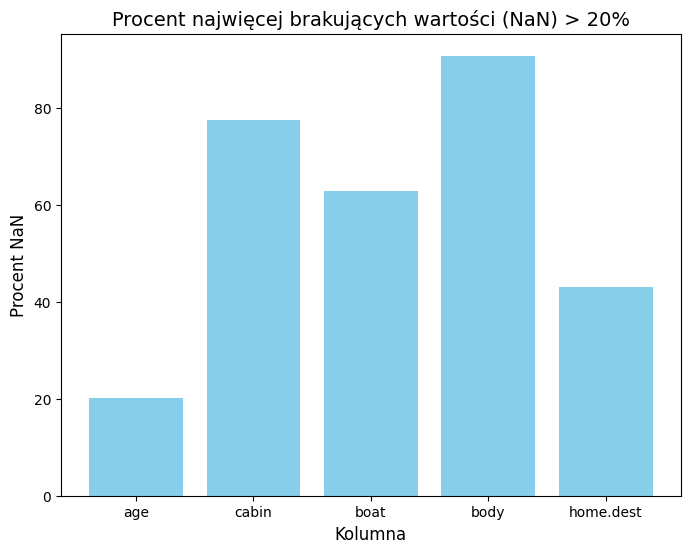

In [65]:
# Wykres brakow NaN powyżej 20% w wybranych kolumnach
braki_powyzej_20 = braki_srednia_logiczna[braki_srednia_logiczna > 20]
# Wykres słupkowy tylko dla kolumn z NaN powyżej 20%
plt.figure(figsize=(8, 6))
plt.bar(braki_powyzej_20.index, braki_powyzej_20.values, color='skyblue')

plt.title('Procent najwięcej brakujących wartości (NaN) > 20%', fontsize=14)
plt.xlabel('Kolumna', fontsize=12)
plt.ylabel('Procent NaN', fontsize=12)

# Wyświetlenie wykresu
plt.show()

#### Macierz korelacji

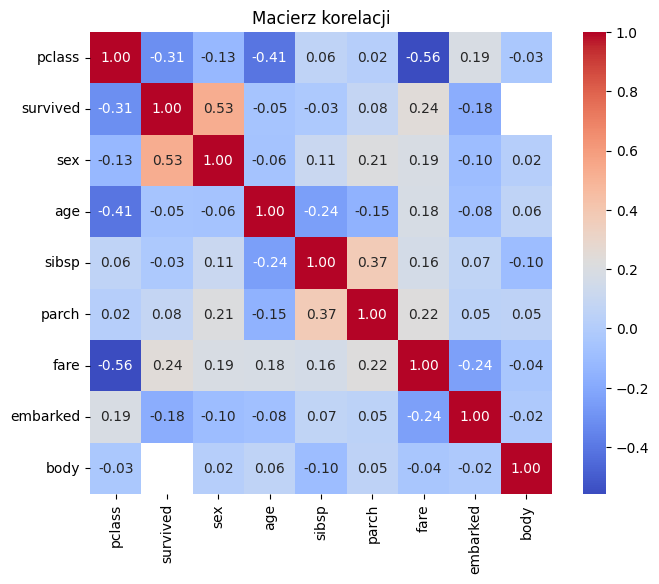

In [66]:
correlation_matrix = df2[['pclass','survived','sex','age','sibsp','parch','fare','embarked','body']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Macierz korelacji')
plt.show()

##### Wnioski:
Macierz korelacji jest bazą dla wykonania wykresów:
- pclass vs. survived/age/fare/embarked/sex
- survived vs. sex/fare/embarked
- sex vs. sibsp/parch/fare
- age vs. sibsp/parch/fare
- sibsp vs. parch/fare/body
- parch vs. fare
- fare vs. embarked

#### pclass vs. survived - histogram dla ofiar

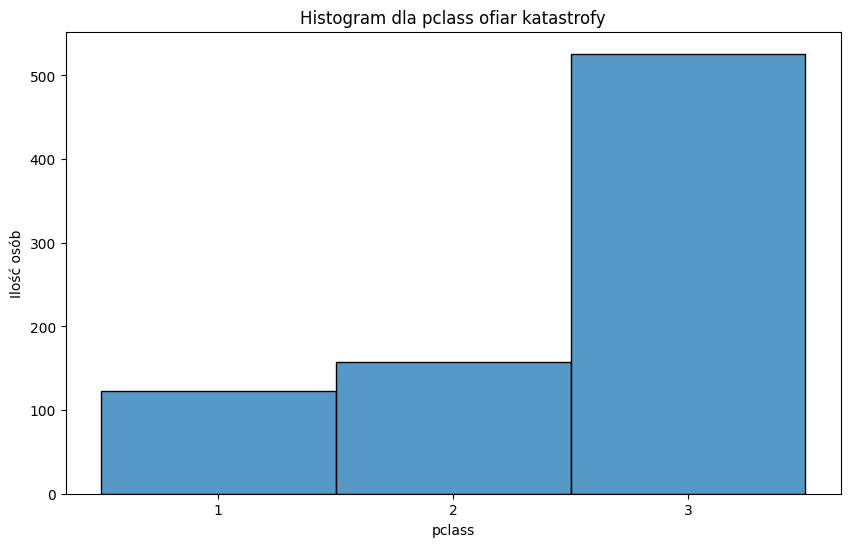

In [67]:
# Przygotowanie wykresu
plt.figure(figsize=(10, 6))
sns.histplot(df2['pclass'][df2['survived'] == 0].dropna(), bins=3, discrete=True)

plt.title('Histogram dla pclass ofiar katastrofy')
plt.xlabel('pclass')
plt.ylabel('Ilość osób')

# Ustalenie podziałek na osi x
plt.xticks([1, 2, 3])

plt.show()


##### Wnioski:
- Najwięcej ofiar kupiło bilet klasy 3, najmniej - klasy 1.

#### pclass vs. survived - histogram dla szczęściarzy

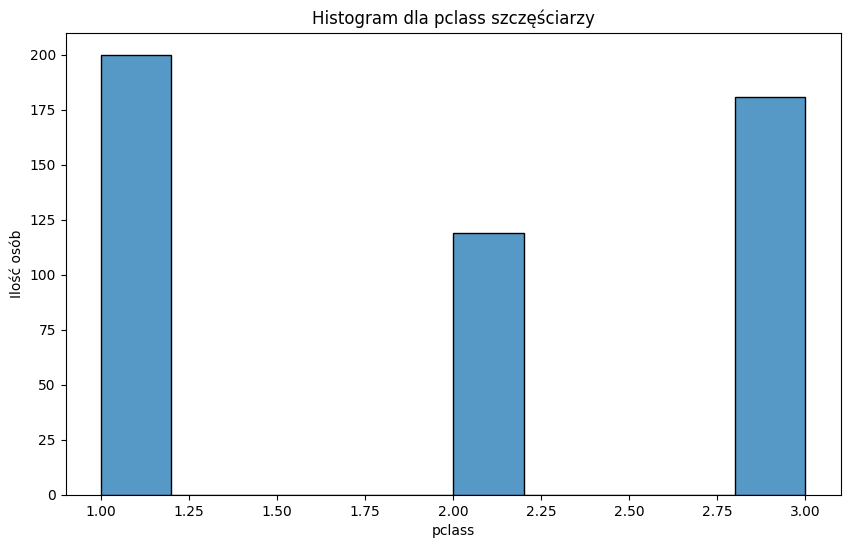

In [68]:
plt.figure(figsize=(10,6))
sns.histplot(df2['pclass'][df2['survived'] == 1].dropna())
plt.title('Histogram dla pclass szczęściarzy')
plt.xlabel('pclass')
plt.ylabel('Ilość osób')
plt.show()

##### Wnioski:
- Najwięcej szczęściarzy kupiło bilet klasy 1 i 3, najmniej szczęściarzy kupiło bilety w klasie
- W klasach pclass 1,2,3 było uratowanych odpowiednio: 200,119,181

#### pclass vs. liczba pasażerów - histogram

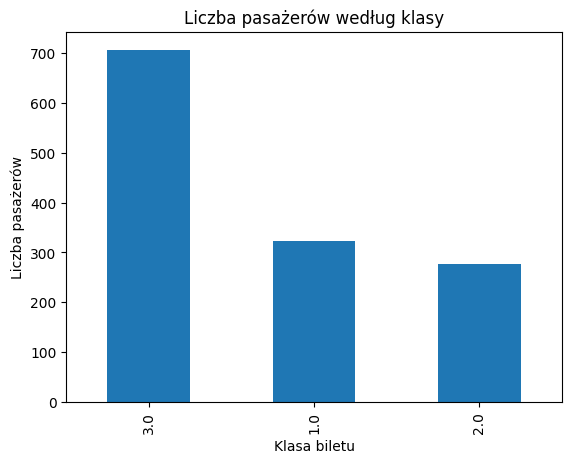

In [69]:
# ile pasażerów do klasy biletu
policz = df2['pclass'].value_counts()
policz.plot(kind='bar')
plt.title('Liczba pasażerów według klasy')
plt.xlabel('Klasa biletu')
plt.ylabel('Liczba pasażerów')
plt.show()

##### Wnioski
- Najwięcej pasażerów podróżowało z biletem klasy 3, potem 1 i 2.

#### survived vs. age - histogram dla uratowanych

Text(0, 0.5, 'Ilość osób')

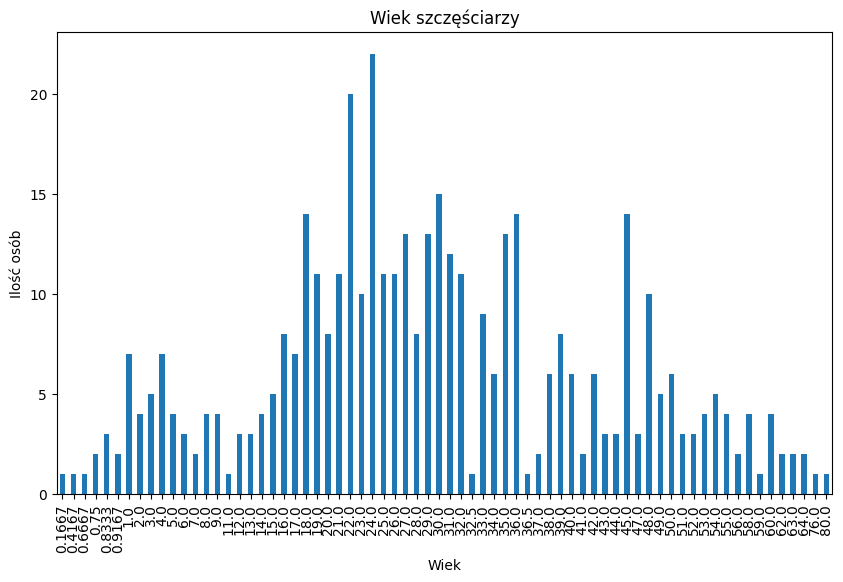

In [70]:
# wykres w jakim wieku byli szczęśliwcy
# Wydobycie kolumny z wiekiem
szczęściarze = df2[df2['survived'] == 1]
wiek_szczęściarzy = szczęściarze['age']

# Tworzenie wykresu słupkowego dla wieku
plt.figure(figsize=(10,6))
wiek_szczęściarzy.value_counts().sort_index().plot(kind='bar')

# Ustawienia osi i tytuł wykresu
plt.title('Wiek szczęściarzy')
plt.xlabel('Wiek')
plt.ylabel('Ilość osób')

##### Wnioski
- Najwyższe słupki na wykresie pozwalają odczytać, że katastrofę Titanica najwięcej przeżyło osób w sile wieku tj. 24, 22, 30 latków.

#### survived vs. age - histogram dla ofiar

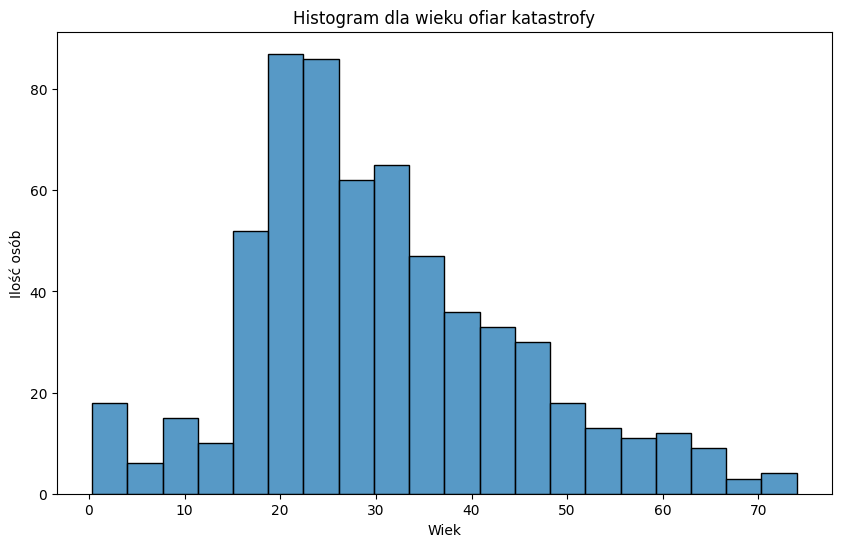

In [71]:
plt.figure(figsize=(10,6))
sns.histplot(df2[df2['survived'] == 0]['age'].dropna(), bins=20, kde=False)
plt.title('Histogram dla wieku ofiar katastrofy')
plt.xlabel('Wiek')
plt.ylabel('Ilość osób')
plt.show()

#### survived vs. age - box chart

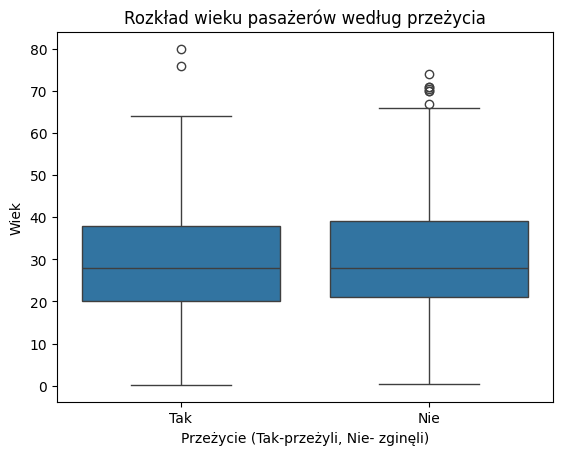

In [72]:
df2['survived'] = df2['survived'].replace({0: 'Nie', 1: 'Tak'})
sns.boxplot(df2, x='survived', y='age')
plt.title('Rozkład wieku pasażerów według przeżycia')
plt.xlabel('Przeżycie (Tak-przeżyli, Nie- zginęli)')
plt.ylabel('Wiek')
plt.show()

##### Wnioski
- Rozkład wartosci dla wieku pasażerów, którzy zginęli jest identyczny z rozkładem dla wieku tych co przeżyli.

#### survived: pie chart in percent

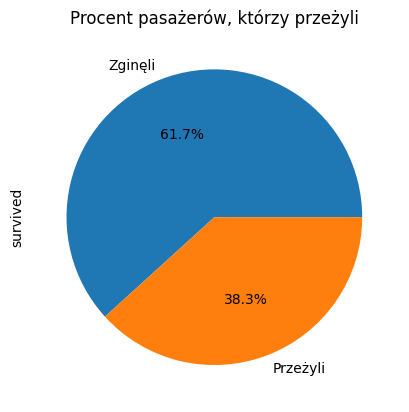

In [73]:
df2['survived'] = df2['survived'].replace({0: 'Nie', 1: 'Tak'})
df2['survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Zginęli', 'Przeżyli'])
plt.title('Procent pasażerów, którzy przeżyli')
plt.show()

##### Wnioski
- W katastrofie zginęło 62 %, przeżyło 38% pasażerów.

#### survived vs. sex - pie chart

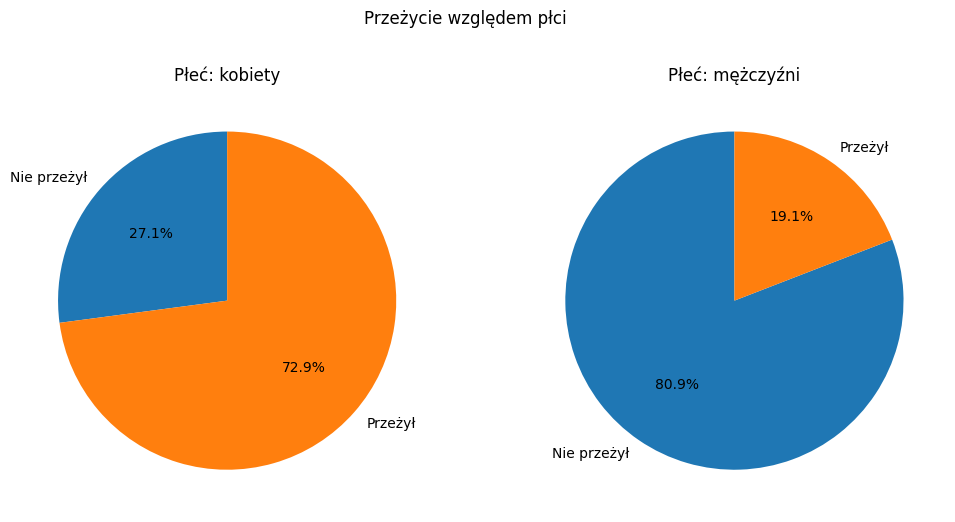

In [74]:
df2['sex'] = df2['sex'].replace({0: 'mężczyźni', 1: 'kobiety'})
survived_sex = df2.groupby(['sex', 'survived']).size().unstack()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, sex in enumerate(survived_sex.index):
    axes[i].pie(survived_sex.loc[sex], labels=['Nie przeżył', 'Przeżył'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Płeć: {sex}')

plt.suptitle('Przeżycie względem płci')
plt.show()

##### Wnioski:
- Katastrofę przeżyło więcej kobiet, najmnniej szans mieli meżczyźni. Powodem było, że pierwszeństwo do szalup miały kobiety i dzieci.

#### age: box chart

<Axes: >

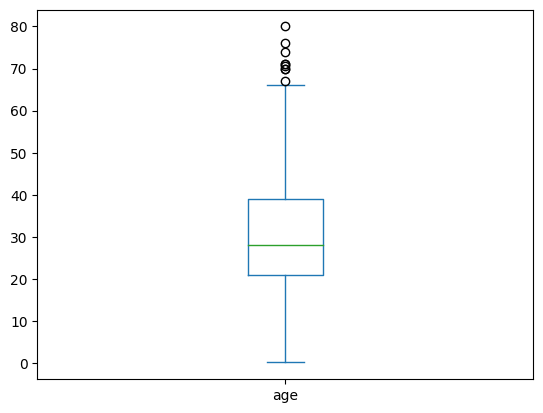

In [75]:
df2['age'].plot(kind='box')

#### age vs. sex: box chart

<Axes: xlabel='sex', ylabel='age'>

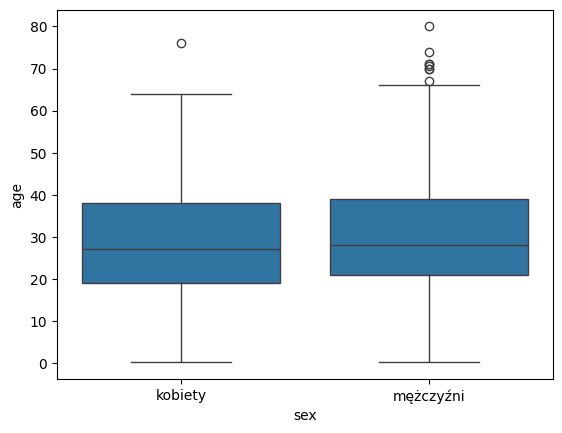

In [76]:
sns.boxplot(x='sex', y='age', data=df2)

##### WNioski:
- Wiek ofiar i uratowanych z poddziałem na płeć ma bardzo podobny rozkład.

#### age: histogram

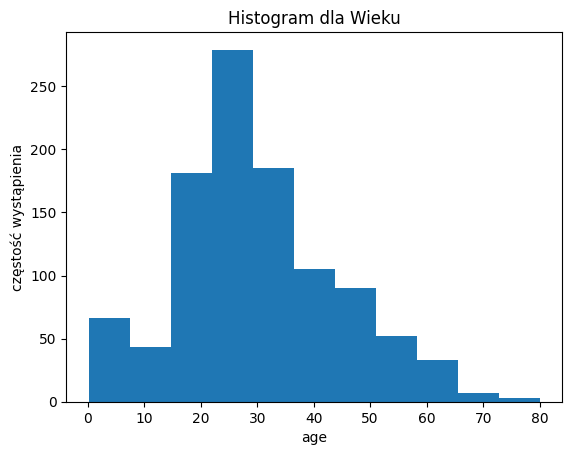

In [77]:
df2['age'].hist(bins=11)
plt.xlabel('age') 
plt.ylabel('częstość wystąpienia') 
plt.title('Histogram dla Wieku')
plt.grid(False)
plt.show()

##### Wniosek
- Największa ilość pasażerów była w wieku od 20 do 30.

#### age vs. pclass box chart

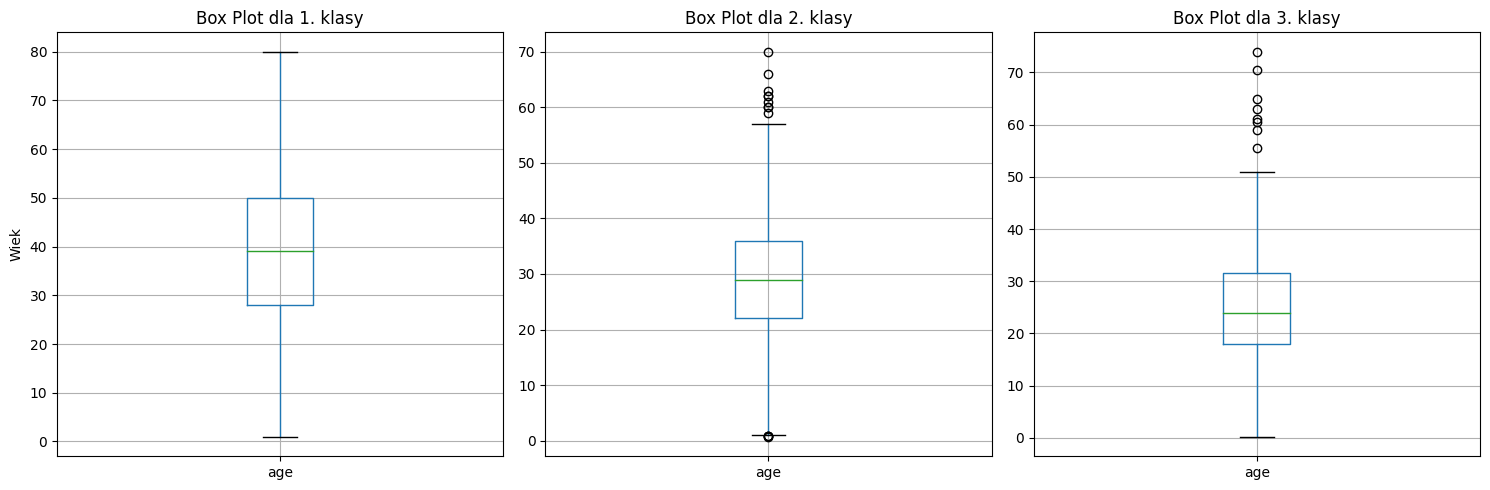

In [78]:
# Tworzenie czytelnego wykresu z trzema osiami obok siebie
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

df3 = df2[['pclass', 'age']]
# tworzenie wykresu pudełkowego dla klasy 1
filtrowanie_1 = df3[df3['pclass'] == 1.0]
filtrowanie_1[['age']].boxplot(ax=axes[0])
axes[0].set_title('Box Plot dla 1. klasy')
axes[0].set_xlabel('')
axes[0].set_ylabel('Wiek')
# tworzenie wykresu pudełkowego dla klasy 2
filtrowanie_2 = df3[df3['pclass'] == 2.0]
filtrowanie_2[['age']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot dla 2. klasy')
axes[1].set_xlabel('')
# tworzenie wykresu pudełkowego dla klasy 3
filtrowanie_3 = df3[df3['pclass'] == 3.0]
filtrowanie_3[['age']].boxplot(ax=axes[2])
axes[2].set_title('Box Plot dla 3. klasy')
axes[2].set_xlabel('')
# Ustawienia odstępów między wykresami
plt.tight_layout()
plt.show()

#### age vs. pclass - inny Wykres pudełkowy

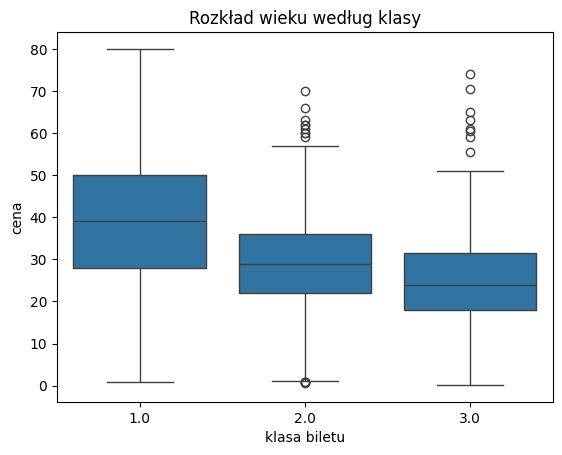

In [79]:
sns.boxplot(df2, x='pclass', y='age')
plt.title('Rozkład wieku według klasy')
plt.xlabel('klasa biletu')
plt.ylabel('cena')
plt.show()

##### Wniosek
- Mediana i wartość Max. dla wieku pokazują, że najlepszą 1. klasę wybierali starsi pasażerowie. Pojedyncze starsze osoby wybierały też klasy niższe 2 i 3. 

#### sibsp: bar chart dla liczby osób podróżujących bez towarzystwa bliskich*

In [80]:
# Sprawdzenie typu danych w kolumnie 
df2['sibsp'].dtype
# Zamiana kolumny 'sibsp' z float na integer bez zaokrąglania
df2['sibsp'] = df2['sibsp'].astype(int)

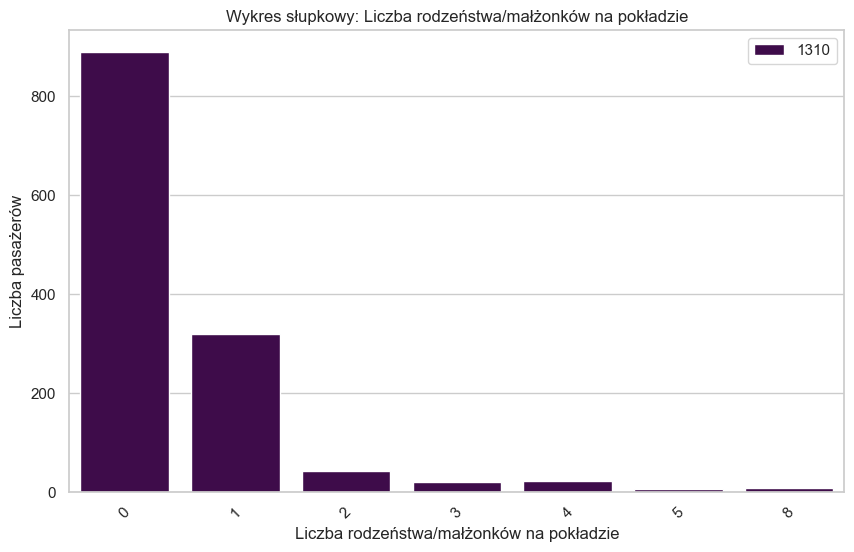

In [132]:
# Ustawienie stylu Seaborn
sns.set(style="whitegrid")

# Wykres słupkowy
plt.figure(figsize=(10, 6))

# Zliczanie wystąpień liczby rodziców dzieci
sns.countplot(data=df2, x='sibsp', palette='viridis', hue=x)

plt.title('Wykres słupkowy: Liczba rodzeństwa/małżonków na pokładzie')
plt.xlabel('Liczba rodzeństwa/małżonków na pokładzie')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=45)  # Umożliwienie rotacji etykiet, jeśli to konieczne
plt.show()

##### Wniosek
- Najwięcej pasażerów było bez osób towarzyszących typu rodzeństwo czy małżonek. 

#### parch: bar chart dla liczby osób podróżujących bez towarzystwa bliskich*

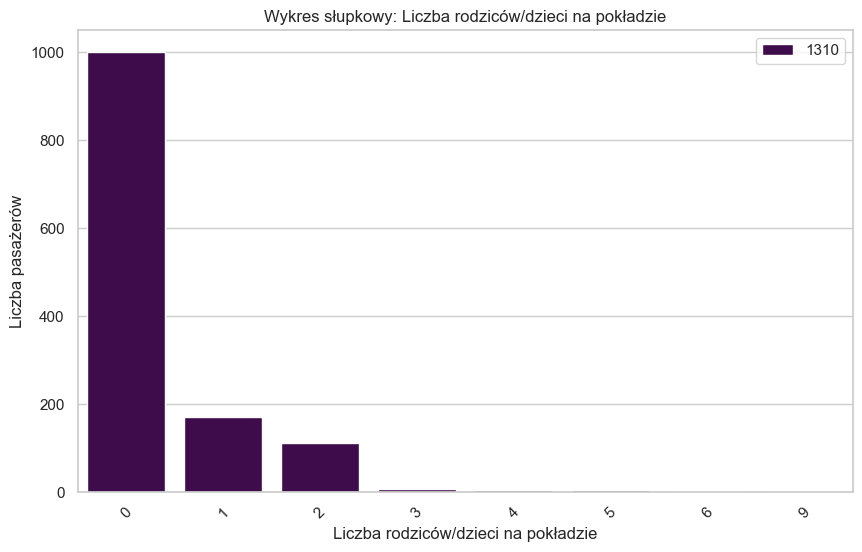

In [135]:
# Sprawdzenie typu danych w kolumnie 
df2['parch'].dtype
# Zamiana kolumny 'parch' z float na integer bez zaokrąglania
df2['parch'] = df2['parch'].astype(int)
# Ustawienie stylu Seaborn
sns.set(style="whitegrid")

# Wykres słupkowy
plt.figure(figsize=(10, 6))

# Zliczanie wystąpień liczby rodziców dzieci
sns.countplot(data=df2, x='parch', palette='viridis', hue=x)

plt.title('Wykres słupkowy: Liczba rodziców/dzieci na pokładzie')
plt.xlabel('Liczba rodziców/dzieci na pokładzie')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=45)  # Umożliwienie rotacji etykiet, jeśli to konieczne
plt.show()

##### Wniosek
- Najwięcej pasażerów było bez osób towarzyszących typu rodzice / dzieci. 

#### parch: liczba rodzin wśród wszystkich pasażerów

liczba osob z rodzina: 307
Liczba osób bez rodziny: 1000


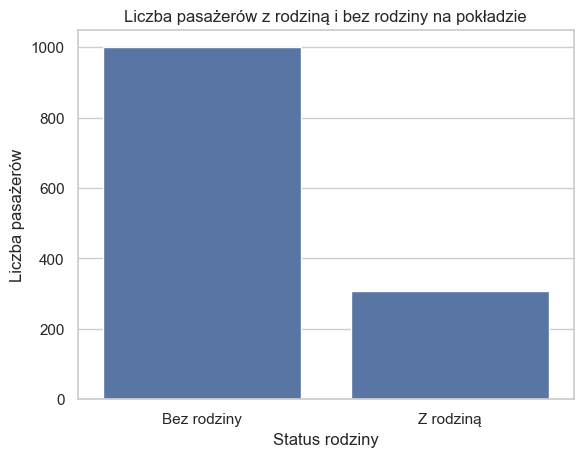

In [83]:
# Tworzenie nowej kolumny 'maRodzine' dla pasażerów, którzy mają rodzinę na pokładzie
df2['maRodzine'] = df2['parch'] > 0
print(f"liczba osob z rodzina: {df2['maRodzine'].sum()}")
liczba_bez_rodziny = (~df2['maRodzine']).sum()
print(f"Liczba osób bez rodziny: {liczba_bez_rodziny}")

# Tworzenie wykresu słupkowego
sns.countplot(x='maRodzine', data=df2)
plt.xticks([0, 1], ['Bez rodziny', 'Z rodziną'])
plt.title("Liczba pasażerów z rodziną i bez rodziny na pokładzie")
plt.xlabel("Status rodziny")
plt.ylabel("Liczba pasażerów")
plt.show()

##### Wniosek
- Najwięcej pasazerów było bez rodzin. liczba osob z rodzina: 307
Liczba osób bez rodziny: 1000

Liczba ocalonych pasażerów bez rodziny: 336
Liczba ocalonych pasażerów z jednym krewnym: 100
Liczba ocalonych pasażerów z dwojgiem krewnych: 57


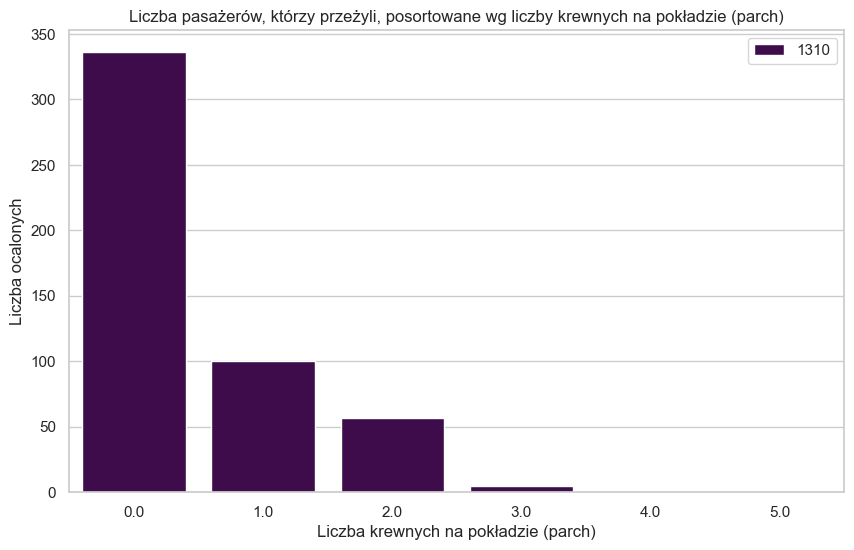

In [138]:
# Filtrowanie danych dla pasażerów, którzy przeżyli
survived_data = df[df['survived'] == 1]
# Filtrowanie danych dla pasażerów, którzy przeżyli i nie mieli rodziny na pokładzie
survived_no_family = survived_data[survived_data['parch'] == 0] 
# Filtrowanie danych dla pasażerów, którzy przeżyli i mieli jednego krewnego
survived_family1 = survived_data[survived_data['parch'] == 1]
# Filtrowanie danych dla pasażerów, którzy przeżyli i mieli dwojga krewnych
survived_family2 = survived_data[survived_data['parch'] == 2]

# Wypisanie liczby ocalonych pasażerów bez rodziny
print(f"Liczba ocalonych pasażerów bez rodziny: {len(survived_no_family)}")
print(f"Liczba ocalonych pasażerów z jednym krewnym: {len(survived_family1)}")
print(f"Liczba ocalonych pasażerów z dwojgiem krewnych: {len(survived_family2)}")
# Wykres
plt.figure(figsize=(10, 6))
sns.countplot(data=survived_data, x='parch', palette='viridis', hue=x)
plt.title('Liczba pasażerów, którzy przeżyli, posortowane wg liczby krewnych na pokładzie (parch)')
plt.xlabel('Liczba krewnych na pokładzie (parch)')
plt.ylabel('Liczba ocalonych')
plt.show()

##### Wniosek:
- około 336 ocalonych nie miało krewnych na pokładzie. 100 ocalonych było z jednym rodzicem albo z jednym dzieckiem na Titaniku. Kolejne 57 osób, które przeżyły miało dwoje rodziców lub dwójkę dzieci. 

Liczba ofiar bez rodziny: 664
Liczba ofiar z jednym krewnym: 70
Liczba ofiar z dwojgiem krewnych: 56


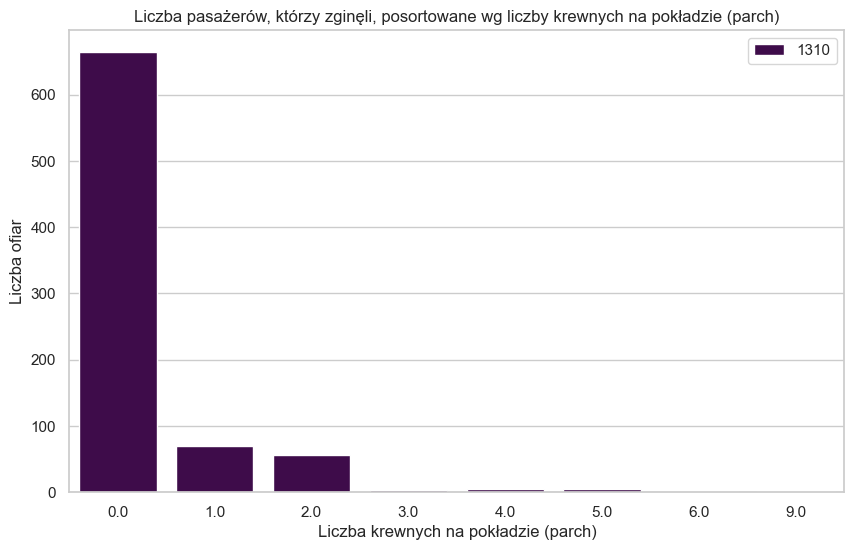

In [137]:
# Filtrowanie danych dla pasażerów, którzy zgineli
survived_data = df[df['survived'] == 0]
# Filtrowanie danych dla pasażerów, którzy zgineli i nie mieli rodziny na pokładzie
survived_no_family = survived_data[survived_data['parch'] == 0]
# Filtrowanie danych dla pasażerów, którzy zgineli i mieli krewnych == 1
survived_family1 = survived_data[survived_data['parch'] == 1]
# Filtrowanie danych dla pasażerów, którzy zgineli i mieli krewnych == 2
survived_family2 = survived_data[survived_data['parch'] == 2]
# Wypisanie liczby ofiar bez rodziny i z jednym krewnym
print(f"Liczba ofiar bez rodziny: {len(survived_no_family)}")
print(f"Liczba ofiar z jednym krewnym: {len(survived_family1)}")
print(f"Liczba ofiar z dwojgiem krewnych: {len(survived_family2)}")
# Wykres
plt.figure(figsize=(10, 6))
sns.countplot(data=survived_data, x='parch', palette='viridis', hue=x)
plt.title('Liczba pasażerów, którzy zginęli, posortowane wg liczby krewnych na pokładzie (parch)')
plt.xlabel('Liczba krewnych na pokładzie (parch)')
plt.ylabel('Liczba ofiar')
plt.show()

##### Wniosek:
- około 664 ofiar nie miało krewnych na pokładzie. Około 80 ofiar było z rodzicem albo z jednym dzieckiem na Titaniku. Dalsze 50 osób miało dwoje rodziców lub dwójkę dzieci.

#### fare: histogram

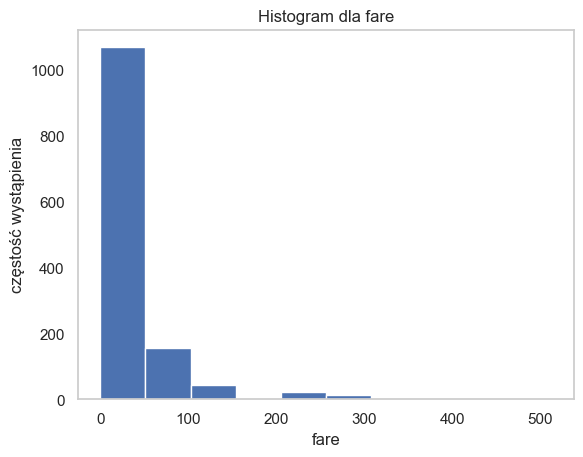

In [86]:
df2['fare'].hist(bins=10)
plt.xlabel('fare') 
plt.ylabel('częstość wystąpienia') 
plt.title('Histogram dla fare')
plt.grid(False)
plt.show()

##### Wniosek:
- Najwięcej sprzedano biletów w cenie do 50 dollars. 20% biletów kosztowało do 100 dollars.

#### fare: boxplot

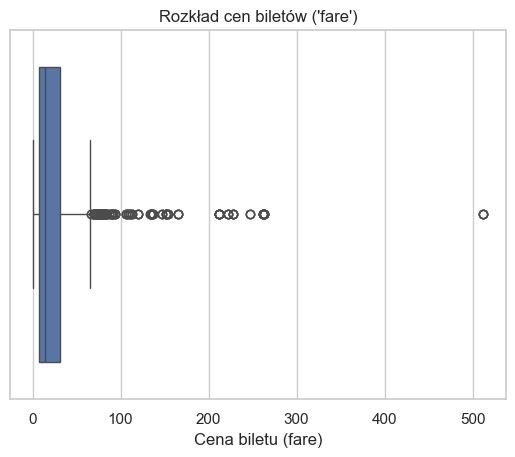

In [87]:
sns.boxplot(x='fare', data=df2)
plt.title("Rozkład cen biletów ('fare')")
plt.xlabel("Cena biletu (fare)")
plt.show()

##### Wniosek:
- Wartość odstająca mocno, ogranicza odczytanie cen. Rozkłady cen najlepiej odczytać z tabeli statystycznego opisu.

#### fare vs. pclass - box chart

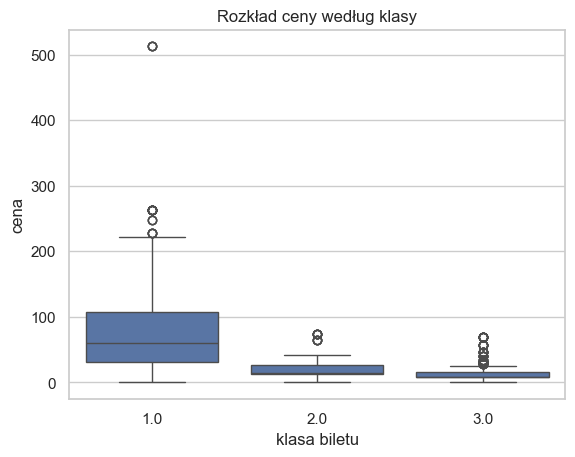

In [88]:
sns.boxplot(df2, x='pclass', y='fare')
plt.title('Rozkład ceny według klasy')
plt.xlabel('klasa biletu')
plt.ylabel('cena')
plt.show()

##### Wnioski:
- Ceny dla 1. klasy są najwyższe i mają największy rozrzut. Za najdroższy bilet zapłacono 1000 % średniej ceny (50 $) w tej klasie.
- Generalnie im większy numer dla klasy biletu tym niższa cena biletu

#### fare vs. pclass: Inny wykres pudełkowy

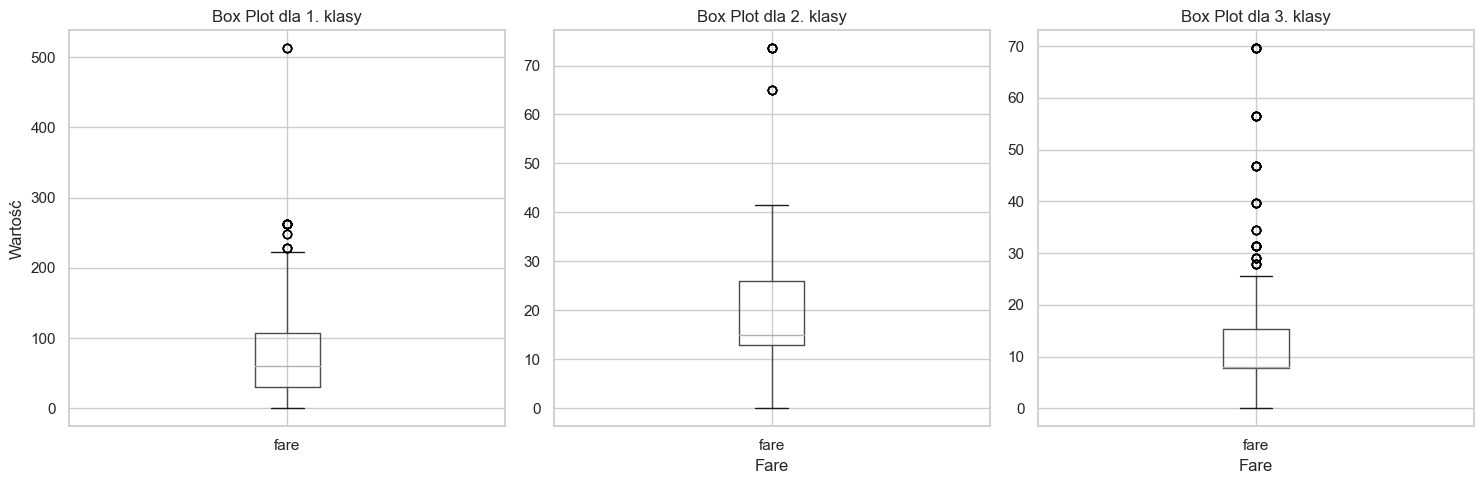

In [89]:
# Tworzenie nowego wykresu z trzema osiami obok siebie
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

df3 = df2[['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body']]
# tworzenie wykresu pudełkowego dla klasy 1
filtrowanie_1 = df3[df3['pclass'] == 1.0]
filtrowanie_1[['fare']].boxplot(ax=axes[0])
axes[0].set_title('Box Plot dla 1. klasy')
axes[0].set_xlabel('')
axes[0].set_ylabel('Wartość')
# tworzenie wykresu pudełkowego dla klasy 2
filtrowanie_2 = df3[df3['pclass'] == 2.0]
filtrowanie_2[['fare']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot dla 2. klasy')
axes[1].set_xlabel('Fare')
# tworzenie wykresu pudełkowego dla klasy 3
filtrowanie_3 = df3[df3['pclass'] == 3.0]
filtrowanie_3[['fare']].boxplot(ax=axes[2])
axes[2].set_title('Box Plot dla 3. klasy')
axes[2].set_xlabel('Fare')
# Ustawienia odstępów między wykresami
plt.tight_layout()
plt.show()

##### Wnioski
- dla 1. klasy 50 % cen biletów nie jest droższa niż 60 dollars. 75% cen mieści się w zakresie do 105 dollars. Maksymalna cena do 220 dollars. Pojawiły się 4 wartości odstające w zakresie 230-520 dollars.
- dla 2. klasy 50 % cen biletów nie jest droższa niż 18 dollars. 75% cen mieści się w zakresie do 27 dollars. Maksymalna cena do 42 dollars. Pojawiły się 2 wartości odstające w zakresie 66 i 75 dollars.
- dla 3. klasy 50 % cen biletów nie jest droższa niż 8 dollars. 75% cen mieści się w zakresie do 17 dollars. Maksymalna cena do 27 dollars. Pojawiły się 8 wartości odstające w zakresie 29-69 dollars.

#### embarked vs. fare

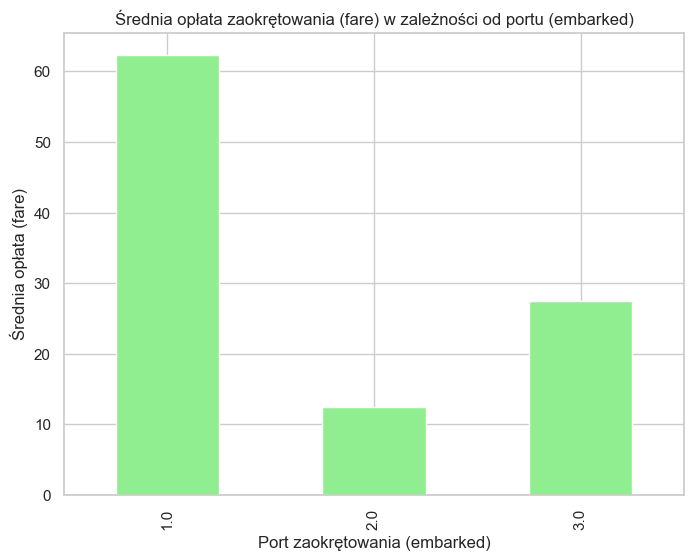

In [90]:
# Oblicz średnią opłatę dla każdego portu zaokrętowania
embarked_fare = df2.groupby('embarked')['fare'].mean()

# Ustawienie rozmiaru wykresu
plt.figure(figsize=(8, 6))

# Tworzenie wykresu słupkowego
embarked_fare.plot(kind='bar', color='lightgreen')

# Dodanie etykiet i tytułu
plt.title("Średnia opłata zaokrętowania (fare) w zależności od portu (embarked)")
plt.xlabel("Port zaokrętowania (embarked)")
plt.ylabel("Średnia opłata (fare)")

# Wyświetlenie wykresu
plt.show()

##### Wniosek:
- Porty dalej oddalone od NY mają średnie ceny wyższe. Od najdalszego: C = Cherbourg, S = Southampton, Q = Queenstown

#### embarked: histogram ilości pasażerów wg portu wsiadania

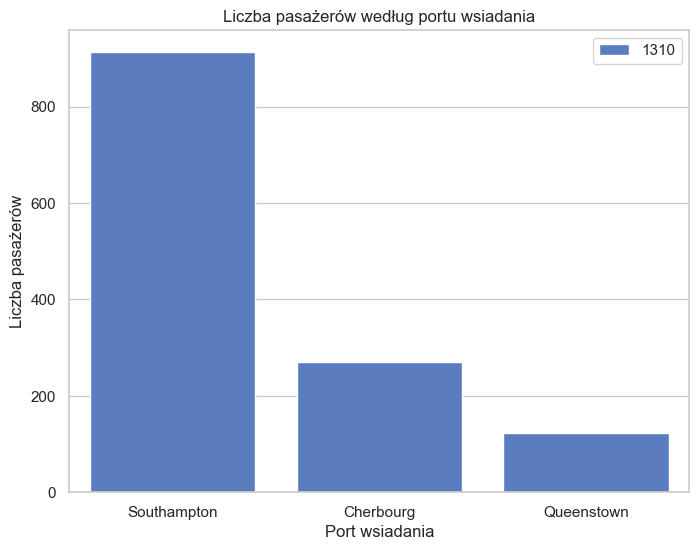

In [129]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='embarked', palette='muted', hue=x)
plt.title('Liczba pasażerów według portu wsiadania')
plt.xlabel('Port wsiadania')
plt.ylabel('Liczba pasażerów')
plt.xticks(ticks=[0, 1, 2], labels=['Southampton', 'Cherbourg', 'Queenstown'])
plt.show()

##### Wniosek:
- Najwięcej osób 900 zaczęło podróż z Cherbourg, potem Queenstown 300, Southampton 100 w kolejności malejącej.

#### **embarked vs. survived

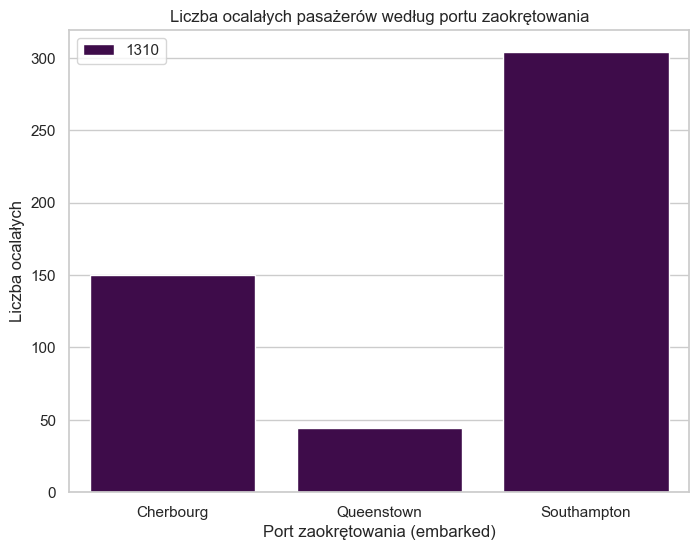

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrowanie danych dla pasażerów, którzy przeżyli
survived_data = df2[df2['survived'] == 'Tak']

# Usunięcie wierszy z brakującymi wartościami w kolumnie 'embarked'
survived_data = survived_data.dropna(subset=['embarked'])

# Tworzenie wykresu słupkowego liczby przeżyłych pasażerów w zależności od portu zaokrętowania
plt.figure(figsize=(8, 6))
sns.countplot(data=survived_data, x='embarked', palette='viridis', hue=x)
plt.title('Liczba ocalałych pasażerów według portu zaokrętowania')
plt.xlabel('Port zaokrętowania (embarked)')
plt.ylabel('Liczba ocalałych')
plt.xticks(ticks=[0, 1, 2], labels=['Cherbourg', 'Queenstown', 'Southampton'])
plt.show()

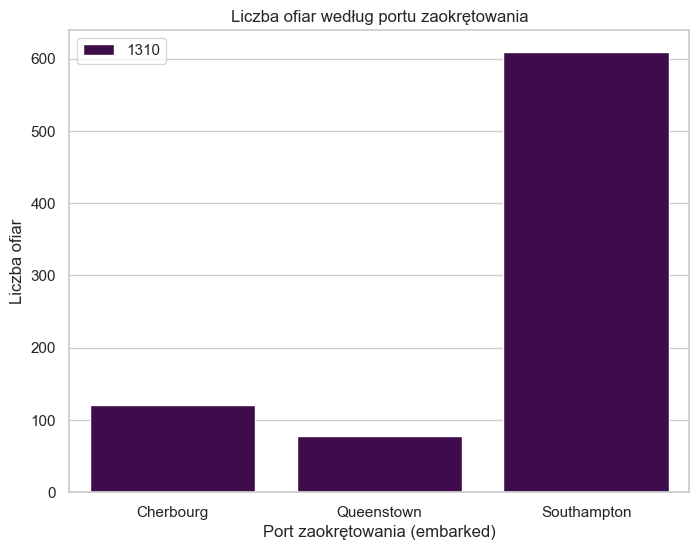

In [131]:
# Filtrowanie danych dla pasażerów, którzy zginęli
survived_data = df2[df2['survived'] == 'Nie']

# Tworzenie wykresu słupkowego liczby przeżyłych pasażerów w zależności od portu zaokrętowania
plt.figure(figsize=(8, 6))
sns.countplot(data=survived_data, x='embarked', palette='viridis', hue=x)
plt.title('Liczba ofiar według portu zaokrętowania')
plt.xlabel('Port zaokrętowania (embarked)')
plt.ylabel('Liczba ofiar')
plt.xticks(ticks=[0, 1, 2], labels=['Cherbourg', 'Queenstown', 'Southampton'])
plt.show()

##### Wniosek:
- Procentowo najmniej ofiar dla S.

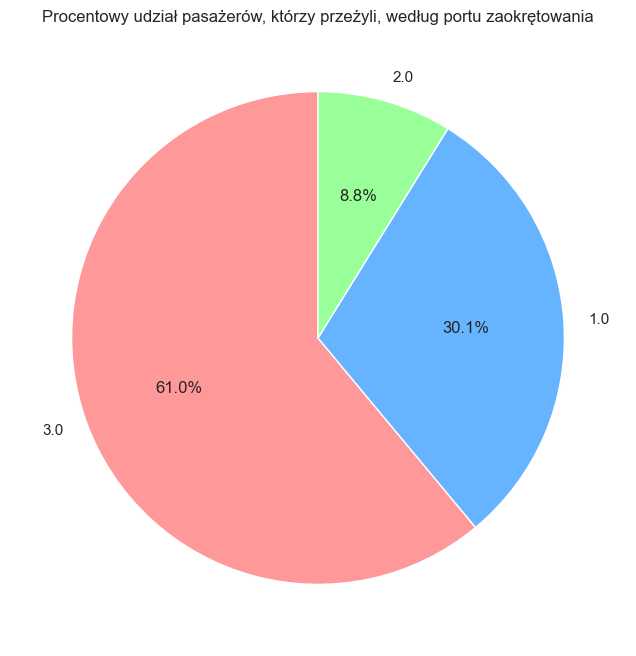

In [106]:
# Filtrowanie danych dla pasażerów, którzy przeżyli
survived_data = df2[df2['survived'] == 'Tak']

# Obliczanie liczby przeżyłych pasażerów dla każdego portu
embarked_counts = survived_data['embarked'].value_counts()

# Tworzenie wykresu kołowego
plt.figure(figsize=(8, 8))
plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title("Procentowy udział pasażerów, którzy przeżyli, według portu zaokrętowania")
plt.show()

##### Wniosek:
- Najwięcej ocalałych wsiadających w porcie S. Najmniej z Q.

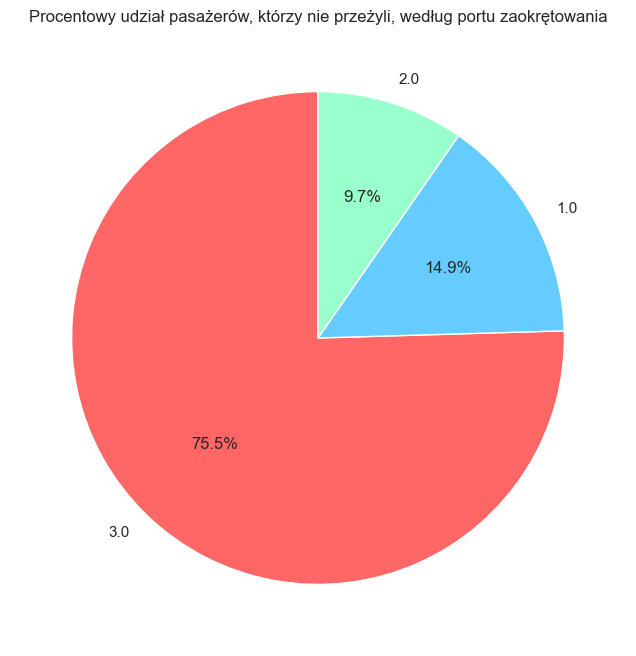

In [108]:
# Filtrowanie danych dla pasażerów, którzy nie przeżyli
not_survived_data = df2[df2['survived'] == 'Nie']

# Obliczanie liczby nieprzeżyłych pasażerów dla każdego portu
embarked_counts = not_survived_data['embarked'].value_counts()

# Tworzenie wykresu kołowego
plt.figure(figsize=(8, 8))
plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff6666', '#66ccff', '#99ffcc'])
plt.title("Procentowy udział pasażerów, którzy nie przeżyli, według portu zaokrętowania")
plt.show()

##### Wniosek:
- Najwięcej ofiar wsiadających w porcie S. Najmniej z Q.

#### boat: ilość rozbitków pro szalupę - bar chart

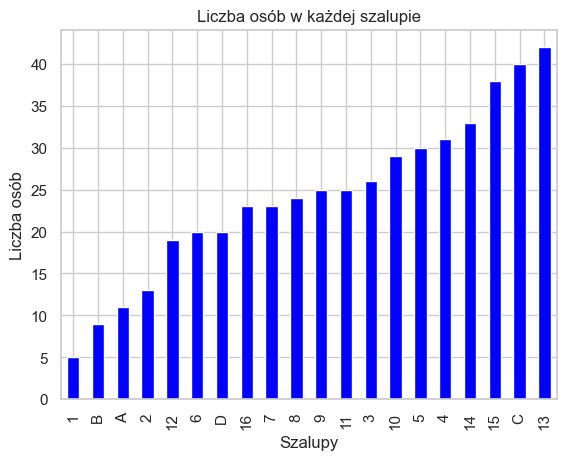

In [109]:
# Zliczanie liczby osób w każdej szalupie
liczba_osob_w_szalupach = df2.groupby('boat').size().sort_values()
# Tworzenie wykresu
liczba_osob_w_szalupach.plot(kind='bar', color='blue')
# Dodanie tytułu i etykiet
plt.title('Liczba osób w każdej szalupie')
plt.xlabel('Szalupy')
plt.ylabel('Liczba osób')

# Wyświetlenie wykresu
plt.show()

##### Wniosek:
- Można ustawić szalupy w taki sposób, że pokażą prawie liniowy rozkład liczby rozbitków na szalupę. Min. 5 osób, max.42.

#### *boat: porównanie liczby szalup do liczby uratowanych

Liczba szalup: 20
Liczba uratowanych: 500


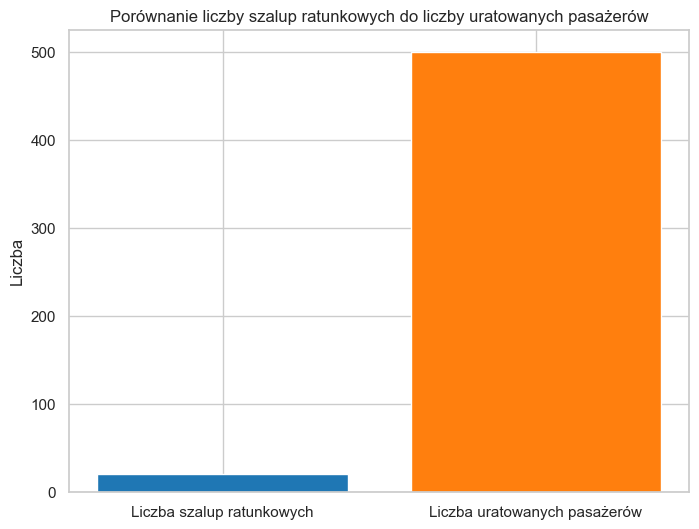

In [119]:
# Obliczanie liczby szalup ratunkowych
ilosc_szalup = df2['boat'].nunique()
print(f"Liczba szalup: {ilosc_szalup}")
# Obliczanie liczby uratowanych pasażerów (survived = 'Tak')
ilosc_uratowanych = df2[df2['survived'] == 'Tak'].shape[0]
print(f"Liczba uratowanych: {ilosc_uratowanych}")
# Tworzenie wykresu porównawczego
labels = ['Liczba szalup ratunkowych', 'Liczba uratowanych pasażerów']
values = [ilosc_szalup, ilosc_uratowanych]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['#1f77b4', '#ff7f0e'])
plt.title('Porównanie liczby szalup ratunkowych do liczby uratowanych pasażerów')
plt.ylabel('Liczba')
plt.show()


#### *body

liczba_cial: 121
liczba_ofiar: 807
liczba_cial_nieodnalezionych:  686


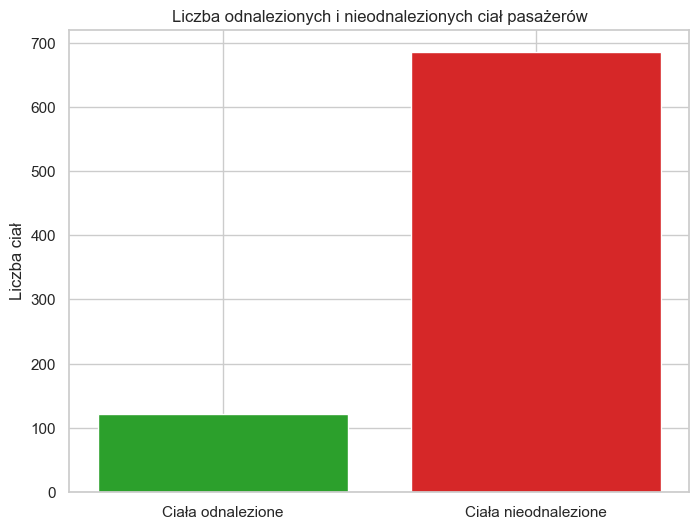

In [121]:
# Liczba pasażerów, których ciała zostały odnalezione
liczba_cial = df2['body'].notnull().sum()
print(f"liczba_cial: {liczba_cial}")

# Liczba pasażerów, którzy nie przeżyli
liczba_ofiar = df2[df2['survived'] == 'Nie'].shape[0]
print("liczba_ofiar:", liczba_ofiar)

# Liczba ciał nieodnalezionych
liczba_cial_nieodnalezionych = liczba_ofiar - liczba_cial
print('liczba_cial_nieodnalezionych: ', liczba_cial_nieodnalezionych)
# Przygotowanie danych do wykresu
labels = ['Ciała odnalezione', 'Ciała nieodnalezione']
values = [liczba_cial, liczba_cial_nieodnalezionych]

# Tworzenie wykresu słupkowego
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['#2ca02c', '#d62728'])
plt.title('Liczba odnalezionych i nieodnalezionych ciał pasażerów')
plt.ylabel('Liczba ciał')
plt.show()

##### Wniosek:
- Liczba ciał odnalezionych 121 i 686 nieodnalezionych.

#### *home.dest: histogram

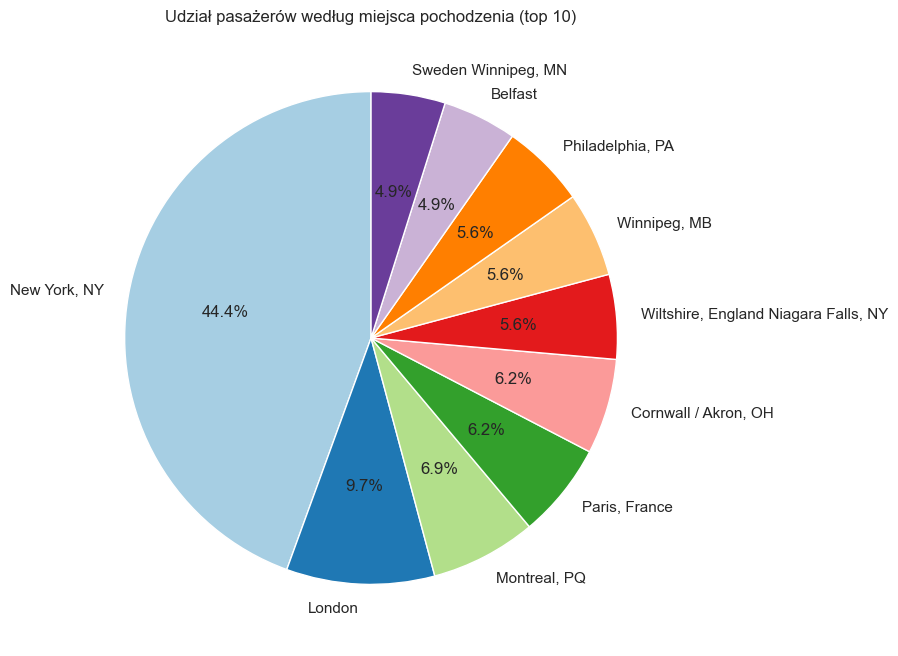

In [122]:
# Zliczanie liczby pasażerów z każdego miejsca docelowego
home_dest_counts = df2['home.dest'].value_counts()

# Tworzenie wykresu kołowego
plt.figure(figsize=(8, 8))
home_dest_counts[:10].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Udział pasażerów według miejsca pochodzenia (top 10)')
plt.ylabel('')  # Usunięcie etykiety Y dla estetyki
plt.show()

##### Wniosek:
- Najwięcej pasażerów pochodziło z NY 44%, London 10%, Montreal 7%, Paryż 6%. 

### 1.3. Podsumowanie
1. W punkcie 1.1.1. podsumowano wstępną analizę i oczyszczanie oraz transformacje danych, któych celem było przygotowanie do wizulizowania i poprawnego wyciągania wniosków.   
1. Podstawą dla wizualizacji jest Macierz korelacji. Współczynniki wskazały na zależności do wykonania wykresów:
pclass vs. survived/age/fare/embarked/sex
survived vs. sex/fare/embarked
sex vs. sibsp/parch/fare
age vs. sibsp/parch/fare
sibsp vs. parch/fare/body
parch vs. fare
fare vs. embarked

Poniżej zebrano wszystkie wnioski z pojedynczych wykresów.
- Statkiem podróżowało 1307 pasażerów. Ilość kobiet 465 , Liczba mężczyzn 842 (w tym liczba wierszy mężczyzn bez tytułu Mr. z przodu nazwiska: 85.
- W katastrofie zginęło 62 %, przeżyło 38% pasażerów.
- Pasażerowie Titanica podróżowali z biletem klasy 3, 1, 2 odpowiednio w kolejności malejącej liczby pasażerów. Najwięcej ofiar posiadało bilet klasy 3, najmniej ofiar - klasy 1. Najwięcej uratowanych miało bilet klasy 1 i 3, najmniej - bilety w klasie 2.
- W klasach 1, 2, 3 uratowanych było odpowiednio: 200,119,181 osób.
- Największa ilość pasażerów była w wieku od 20 do 30 lat.
- Katastrofę Titanica przeżyło najwięcej osób w młodym wieku tj. 24, 22, 30 latków (według histogramu).
- Rozkład wieku pasażerów, którzy zginęli jest identyczny z rozkładem dla tych co przeżyli.
- Katastrofę przeżyło więcej kobiet. Najmniejsze szanse mieli mężczyźni. Przypuszczam, że powodem było pierwszeństwo do szalup dla kobiet i dzieci.
- Rozkład wieku ofiar i uratowanych z poddziałem na płeć jest wręcz identyczny.
- Mediana i wartość Max. dla wieku pokazują, że najlepszą 1. klasę wybierali starsi pasażerowie. Pojedyncze starsze osoby wybierały też klasy niższe 2 i 3.
- Kolumna parch pokazała, że większość osób (1000) podróżowała bez osób spokrewnionych. 307 podróżowało  z krewnymi. Z jednym rodzicem albo jednym dzieckiem jest  170 osób. Z dwójką dzieci lub dwojgiem rodziców jest 113 wpisów. Liczba osób należących do rodzin: 519. Liczba unikalnych nazwisk (bez powtórzeń): 209.
- Przeanalizowano wszystkie kabiny z długim oznaczeniem wskazującym na zajmowanie wielu kabin względem sibsp i parch. Przypisane były nie tylko do wielu osób np. rodzin, ale też do osób samotnie podróżujących.
- 336 uratowanych nie miało krewnych na pokładzie. Około 100 ocalonych było z jednym rodzicem albo z jednym dzieckiem na pokładzie Titanica. Kolejne 57 osób, które przeżyły miało dwoje rodziców lub dwójkę dzieci.
- 664 ofiary nie miały krewnych na pokładzie. 70 ofiar było z rodzicem albo z jednym dzieckiem. Dalsze 56 osób miało dwoje rodziców lub dwójkę dzieci.
- Najwięcej sprzedano biletów w cenie do 50 dollars. 20% biletów kosztowało do 100 dollars.
- Liczba wierszy z ceną za bilet 0 dollars: 17
- Ceny dla 1. klasy są najwyższe i mają największy rozrzut. Za najdroższy bilet zapłacono 1000 % średniej ceny (50 $) w tej klasie.
- Generalnie im większy numer klasy biletu tym niższa cena biletu.
- Dla 1. klasy 50 % biletów ma cenę nie wyższą niż 60 dollars. 75% cen mieści się w zakresie do 105 dollars. Maksymalna cena wynosi do 220 dollars. Pojawiły się 4 wartości odstające w zakresie 230-520 dollars.
- Dla 2. klasy 50 % cen biletów nie jest droższa niż 18 dollars. 75% cen mieści się w zakresie do 27 dollars. Maksymalna cena do 42 dollars. Pojawiły się 2 wartości odstające w zakresie 66 i 75 dollars.
- Dla 3. klasy 50 % cen biletów nie jest droższa niż 8 dollars. 75% cen mieści się w zakresie do 17 dollars. Maksymalna cena do 27 dollars. Pojawiły się 8 wartości odstające w zakresie 29-69 dollars.
- Porty dalej oddalone od NY mają ceny średnie wyższe. Od najdalszego: C = Cherbourg, S = Southampton, Q = Queenstown
- Najwięcej osób zaczęło podróż z Cherbourg 900, potem Queenstown 300, Southampton 100 w kolejności malejącej.
- Procentowo najmniej ofiar dla Southampton.
- Najwięcej ocalałych wsiadających w porcie Southampton. Najmniej z Queenstown.
- Najwięcej ofiar wsiadających w porcie Southampton. Najmniej z Queenstown.
- Można ustawić szalupy w taki sposób, że pokażą prawie liniowy rozkład liczby rozbitków pro szalupę. Najwięcej osób w szalupie: 39. Najmniej osób w szalupie: 1.
- Całkowita liczba osób we wszystkich szalupach: 486. Liczba uratowanych w katastrofie: 500. A więc nie wszystkich uratowały tylko szalupy.
- Liczba ciał odnalezionych 121 i 686 nieodnalezionych. Suma 807 ofiar.
- Najwięcej pasażerów pochodziło z NY 44%, London 10%, Montreal 7%, Paryż 6% i innych.